# App Rating Predictor
## Building an app rating predictor using data scraped from the android market
### We have scraped some apps from the Google PlayStore, and the primary goals of our project are:
- predict the rating
- predict installation count
- predict whether the app is free or paid 
- predict whether is it ad-supported

But before we start with the explanatory data analysis, we need to do data cleaning/preprocessing because our dataset is VERY UNSTRUCTURED and RAW.

# Table of contents
1. <a href='#memory optimization'>Memory optimization</a>
2. [EDA](#EDA) 
3. <a href='#max installs EDA'>MAX INSTALLS EDA</a>
4. <a href='#rating EDA'>RATING EDA</a>  
5. <a href='#category EDA'>CATEGORY EDA</a>  
6. <a href='#review count EDA'>REVIEW COUNT EDA</a>  
7. <a href='#size EDA'>SIZE EDA</a>  
8. <a href='#singapore EDA'>Singapore EDA</a>
9. <a href='#fang EDA'>FANG EDA</a>
10. <a href='#geospatial analysis'>Geospatial analysis</a>




### Import packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
sb.set() # set the default Seaborn style for graphics
pd.set_option('max_columns', None) #Show all columns, or else some will just be "..."

import plotly.express as px # shows basic statistics of the figure
from dython import nominal # Use for calculating correlation between variables. Including between categorical and numerical variables
import matplotlib.pyplot as plt # we only need pyplot

import plotly.graph_objects as go # Used as trace for subplots
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("./google_app_scrap.csv")
df.head()

Unnamed: 0                        APP_NAME    RATING CATEGORY  \
0           0                Skincare Routine  4.510000   Beauty   
1           1      Booksy Biz: For Businesses  4.313544   Beauty   
2           2  Perfect365 Makeup Photo Editor  4.295216   Beauty   
3           3   Glowbe – Face Yoga & Exercise  3.136364   Beauty   
4           4                          PhiApp  4.233333   Beauty   

       COLLECTIONS  RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  \
0  topselling_paid         609.0              34              11   
1      topgrossing       13176.0            1587             365   
2      topgrossing      782877.0           62917           22800   
3      topgrossing          95.0              38               6   
4      topgrossing         916.0             122              15   

   3_STAR_RATINGS  4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  \
0              23              65             465          89.0      10,000+   
1             464             659           10095        1920.0   1,000,000+   
2           55202          121258          520690       49923.0  50,000,000+   
3               0               2              47          29.0      10,000+   
4              61              45             671          26.0     100,000+   

   MIN_INSTALLS  MAX_INSTALLS   FREE  PRICE CURRENCY                SIZE  \
0         10000         17616  False   3.99      USD                 16M   
1       1000000       1270756   True   0.00      USD                 24M   
2      50000000      54737806   True   0.00      USD                201M   
3         10000         29466   True   0.00      USD                 67M   
4        100000        302978   True   0.00      USD  Varies with device   

                         DEVELOPER  \
0                   Mento Apps Ltd   
1  Booksy International sp. z o.o.   
2                 Perfect365, Inc.   
3                       Glowbe LTD   
4                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   FAMILY_GENRE  AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE  \
0           NaN         False             False           False  Aug 13, 2018   
1           NaN         False              True           False  May 22, 2014   
2           NaN          True              True           False  Feb 19, 2013   
3           NaN         False              True           False   Dec 2, 2020   
4           NaN         False              True           False  Mar 13, 2015   

  LAST_UPDATED DAY_SCRAPED  
0      14/2/22      8/3/22  
1       3/3/22      8/3/22  
2       4/3/22      8/3/22  
3      20/2/22      8/3/22  
4      20/1/22      8/3/22

# Data Cleaning

In [3]:
df.describe(include="all")

Unnamed: 0   APP_NAME        RATING CATEGORY      COLLECTIONS  \
count   23952.00000      23952  23934.000000    23952            23952   
unique          NaN      18496           NaN       48                3   
top             NaN  Solitaire           NaN   Sports  topselling_free   
freq            NaN         27           NaN      944            10593   
mean    11975.50000        NaN      3.988836      NaN              NaN   
std      6914.49116        NaN      1.044631      NaN              NaN   
min         0.00000        NaN      0.000000      NaN              NaN   
25%      5987.75000        NaN      3.891892      NaN              NaN   
50%     11975.50000        NaN      4.300697      NaN              NaN   
75%     17963.25000        NaN      4.561213      NaN              NaN   
max     23951.00000        NaN      5.000000      NaN              NaN   

        RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
count   2.393400e+04    2.395200e+04    2.395200e+04    2.395200e+04   
unique           NaN             NaN             NaN             NaN   
top              NaN             NaN             NaN             NaN   
freq             NaN             NaN             NaN             NaN   
mean    3.899129e+05    4.401561e+04    9.365627e+03    1.810578e+04   
std     3.676933e+06    7.961011e+05    1.007322e+05    1.726730e+05   
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
25%     6.412500e+02    5.800000e+01    1.200000e+01    2.300000e+01   
50%     8.450000e+03    6.805000e+02    1.900000e+02    3.470000e+02   
75%     7.308575e+04    5.809500e+03    1.719250e+03    3.201000e+03   
max     1.571732e+08    4.979285e+07    4.218468e+06    7.601150e+06   

        4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT    INSTALLS  \
count     2.395200e+04    2.395200e+04  2.393400e+04       23952   
unique             NaN             NaN           NaN          22   
top                NaN             NaN           NaN  1,000,000+   
freq               NaN             NaN           NaN        4427   
mean      4.228248e+04    2.758255e+05  1.778189e+04         NaN   
std       3.569045e+05    2.428996e+06  1.179491e+05         NaN   
min       0.000000e+00    0.000000e+00  0.000000e+00         NaN   
25%       5.100000e+01    3.927500e+02  6.400000e+01         NaN   
50%       7.885000e+02    5.698000e+03  5.750000e+02         NaN   
75%       7.650000e+03    5.187900e+04  4.237750e+03         NaN   
max       1.616010e+07    1.125493e+08  4.324801e+06         NaN   

        MIN_INSTALLS  MAX_INSTALLS   FREE         PRICE CURRENCY  \
count   2.395200e+04  2.395200e+04  23952  23952.000000    23952   
unique           NaN           NaN      2           NaN        1   
top              NaN           NaN   True           NaN      USD   
freq             NaN           NaN  18520           NaN    23952   
mean    1.891777e+07  3.073138e+07    NaN      1.422892      NaN   
std     2.201441e+08  2.802337e+08    NaN      8.832669      NaN   
min     0.000000e+00  0.000000e+00    NaN      0.000000      NaN   
25%     5.000000e+04  5.644300e+04    NaN      0.000000      NaN   
50%     5.000000e+05  8.288390e+05    NaN      0.000000      NaN   
75%     5.000000e+06  7.747612e+06    NaN      0.000000      NaN   
max     1.000000e+10  1.139505e+10    NaN    400.000000      NaN   

                      SIZE          DEVELOPER              DEVELOPER_ADDRESS  \
count                23952              23952                          19420   
unique                 666              12343                           8614   
top     Varies with device  My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo   
freq                  3170                137                            137   
mean                   NaN                NaN                            NaN   
std                    NaN                NaN                            NaN   
min                    NaN                NaN                

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         23952 non-null  int64  
 1   APP_NAME           23952 non-null  object 
 2   RATING             23934 non-null  float64
 3   CATEGORY           23952 non-null  object 
 4   COLLECTIONS        23952 non-null  object 
 5   RATING_COUNT       23934 non-null  float64
 6   1_STAR_RATINGS     23952 non-null  int64  
 7   2_STAR_RATINGS     23952 non-null  int64  
 8   3_STAR_RATINGS     23952 non-null  int64  
 9   4_STAR_RATINGS     23952 non-null  int64  
 10  5_STAR_RATINGS     23952 non-null  int64  
 11  REVIEW_COUNT       23934 non-null  float64
 12  INSTALLS           23952 non-null  object 
 13  MIN_INSTALLS       23952 non-null  int64  
 14  MAX_INSTALLS       23952 non-null  int64  
 15  FREE               23952 non-null  bool   
 16  PRICE              239

Some initial observations:
1. UNNAMED: 0 column is same as the index
2. There are no values in FAMILY_GENRE
3. All the values in CURRENCY are the same (usd) which indicates the currency of the price of the app
4. The 5 n_STAR_RATING columns does not always sum up to RATING_COUNT
5. SIZE contains string objects with postfix of K, M, G to indicate the size of the app in bytes
6. The formats for columns with date objects are inconsistent

### Remove useless columns that contain same/empty values which won't contribute to our EDA
We will remove:
- `FAMILY_GENRE`
- `Unnamed: 0`
- `CURRENCY`

In [5]:
df = df.drop(columns=['Unnamed: 0', 'FAMILY_GENRE', 'CURRENCY'])
df.columns

Index(['APP_NAME', 'RATING', 'CATEGORY', 'COLLECTIONS', 'RATING_COUNT',
       '1_STAR_RATINGS', '2_STAR_RATINGS', '3_STAR_RATINGS', '4_STAR_RATINGS',
       '5_STAR_RATINGS', 'REVIEW_COUNT', 'INSTALLS', 'MIN_INSTALLS',
       'MAX_INSTALLS', 'FREE', 'PRICE', 'SIZE', 'DEVELOPER',
       'DEVELOPER_ADDRESS', 'CONTENT_RATING', 'AD_SUPPORTED',
       'IN_APP_PURCHASES', 'EDITORS_CHOICE', 'RELEASED_DATE', 'LAST_UPDATED',
       'DAY_SCRAPED'],
      dtype='object')

### Tidy up `RATING_COUNT`
RATING_COUNT is inconsistent. So we will replace the values in `RATING_COUNT` with the sum of `1_STAR_RATING`, `2_STAR_RATING`, `3_STAR_RATING`, `4_STAR_RATING`, `5_STAR_RATING`.

In [6]:
df['RATING_COUNT'] = df[['1_STAR_RATINGS', '2_STAR_RATINGS', '3_STAR_RATINGS', '4_STAR_RATINGS', '5_STAR_RATINGS']].sum(axis=1)
df.head()

APP_NAME    RATING CATEGORY      COLLECTIONS  \
0                Skincare Routine  4.510000   Beauty  topselling_paid   
1      Booksy Biz: For Businesses  4.313544   Beauty      topgrossing   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty      topgrossing   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty      topgrossing   
4                          PhiApp  4.233333   Beauty      topgrossing   

   RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0           598              34              11              23   
1         13170            1587             365             464   
2        782867           62917           22800           55202   
3            93              38               6               0   
4           914             122              15              61   

   4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  MIN_INSTALLS  \
0              65             465          89.0      10,000+         10000   
1             659           10095        1920.0   1,000,000+       1000000   
2          121258          520690       49923.0  50,000,000+      50000000   
3               2              47          29.0      10,000+         10000   
4              45             671          26.0     100,000+        100000   

   MAX_INSTALLS   FREE  PRICE                SIZE  \
0         17616  False   3.99                 16M   
1       1270756   True   0.00                 24M   
2      54737806   True   0.00                201M   
3         29466   True   0.00                 67M   
4        302978   True   0.00  Varies with device   

                         DEVELOPER  \
0                   Mento Apps Ltd   
1  Booksy International sp. z o.o.   
2                 Perfect365, Inc.   
3                       Glowbe LTD   
4                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE LAST_UPDATED  \
0         False             False           False  Aug 13, 2018      14/2/22   
1         False              True           False  May 22, 2014       3/3/22   
2          True              True           False  Feb 19, 2013       4/3/22   
3         False              True           False   Dec 2, 2020      20/2/22   
4         False              True           False  Mar 13, 2015      20/1/22   

  DAY_SCRAPED  
0      8/3/22  
1      8/3/22  
2      8/3/22  
3      8/3/22  
4      8/3/22

### Clean `SIZE`
`SIZE` are string objects, we will convert them into integers for integer operations in EDA. <br>
For example: 12M -> 12000000, 12K -> 12000, varies with device -> NaN (handle this later)

In [7]:
df["SIZE"] = df["SIZE"].str.replace("Varies with device","-1") #replacing "Varies with device" with -1 
df["SIZE"] = df["SIZE"].str.replace(",","") #replacing ',' with an empty string

#changing k to (10**3), M to (10**6) and G to (10**9)
df["SIZE"] = (df["SIZE"].replace(r'[kMG]+$', '', regex=True).astype(float) * \
                   df["SIZE"].str.extract(r'[\d\.]+([kMG]+)', expand=False)
                   .fillna(1)
                   .replace(['k','M','G'], [10**3, 10**6,10**9]).astype(int))
df['SIZE'] = df['SIZE'].astype('int64') #converting float to int64
df.head()

APP_NAME    RATING CATEGORY      COLLECTIONS  \
0                Skincare Routine  4.510000   Beauty  topselling_paid   
1      Booksy Biz: For Businesses  4.313544   Beauty      topgrossing   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty      topgrossing   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty      topgrossing   
4                          PhiApp  4.233333   Beauty      topgrossing   

   RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0           598              34              11              23   
1         13170            1587             365             464   
2        782867           62917           22800           55202   
3            93              38               6               0   
4           914             122              15              61   

   4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  MIN_INSTALLS  \
0              65             465          89.0      10,000+         10000   
1             659           10095        1920.0   1,000,000+       1000000   
2          121258          520690       49923.0  50,000,000+      50000000   
3               2              47          29.0      10,000+         10000   
4              45             671          26.0     100,000+        100000   

   MAX_INSTALLS   FREE  PRICE       SIZE                        DEVELOPER  \
0         17616  False   3.99   16000000                   Mento Apps Ltd   
1       1270756   True   0.00   24000000  Booksy International sp. z o.o.   
2      54737806   True   0.00  201000000                 Perfect365, Inc.   
3         29466   True   0.00   67000000                       Glowbe LTD   
4        302978   True   0.00         -1                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE LAST_UPDATED  \
0         False             False           False  Aug 13, 2018      14/2/22   
1         False              True           False  May 22, 2014       3/3/22   
2          True              True           False  Feb 19, 2013       4/3/22   
3         False              True           False   Dec 2, 2020      20/2/22   
4         False              True           False  Mar 13, 2015      20/1/22   

  DAY_SCRAPED  
0      8/3/22  
1      8/3/22  
2      8/3/22  
3      8/3/22  
4      8/3/22

Convert all **-1 to NaN**, we will fill this later

In [8]:
df.loc[df['SIZE'] == -1, 'SIZE'] = np.nan
df.head()

APP_NAME    RATING CATEGORY      COLLECTIONS  \
0                Skincare Routine  4.510000   Beauty  topselling_paid   
1      Booksy Biz: For Businesses  4.313544   Beauty      topgrossing   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty      topgrossing   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty      topgrossing   
4                          PhiApp  4.233333   Beauty      topgrossing   

   RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0           598              34              11              23   
1         13170            1587             365             464   
2        782867           62917           22800           55202   
3            93              38               6               0   
4           914             122              15              61   

   4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  MIN_INSTALLS  \
0              65             465          89.0      10,000+         10000   
1             659           10095        1920.0   1,000,000+       1000000   
2          121258          520690       49923.0  50,000,000+      50000000   
3               2              47          29.0      10,000+         10000   
4              45             671          26.0     100,000+        100000   

   MAX_INSTALLS   FREE  PRICE         SIZE                        DEVELOPER  \
0         17616  False   3.99   16000000.0                   Mento Apps Ltd   
1       1270756   True   0.00   24000000.0  Booksy International sp. z o.o.   
2      54737806   True   0.00  201000000.0                 Perfect365, Inc.   
3         29466   True   0.00   67000000.0                       Glowbe LTD   
4        302978   True   0.00          NaN                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE LAST_UPDATED  \
0         False             False           False  Aug 13, 2018      14/2/22   
1         False              True           False  May 22, 2014       3/3/22   
2          True              True           False  Feb 19, 2013       4/3/22   
3         False              True           False   Dec 2, 2020      20/2/22   
4         False              True           False  Mar 13, 2015      20/1/22   

  DAY_SCRAPED  
0      8/3/22  
1      8/3/22  
2      8/3/22  
3      8/3/22  
4      8/3/22

### Reformat dates

`RELEASED_DATE`, `LAST_UPDATED`, `DAY_SCRAPED` are string objects, and their format are inconsistent and different. Hence, we will reformat them into **"dd/mm/yyyy"**.

In [9]:
#Convert strings to datetime
df['RELEASED_DATE'] = pd.to_datetime(df['RELEASED_DATE'])
df['LAST_UPDATED'] = pd.to_datetime(df['LAST_UPDATED'], format="%d/%m/%y")
df['DAY_SCRAPED'] = pd.to_datetime(df['DAY_SCRAPED'], format="%d/%m/%y")

#reformat date
df['RELEASED_DATE'] = df['RELEASED_DATE'].dt.strftime('%d/%m/%Y')
df['LAST_UPDATED'] = df['LAST_UPDATED'].dt.strftime('%d/%m/%Y')
df['DAY_SCRAPED'] = df['DAY_SCRAPED'].dt.strftime('%d/%m/%Y')
df.head()

APP_NAME    RATING CATEGORY      COLLECTIONS  \
0                Skincare Routine  4.510000   Beauty  topselling_paid   
1      Booksy Biz: For Businesses  4.313544   Beauty      topgrossing   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty      topgrossing   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty      topgrossing   
4                          PhiApp  4.233333   Beauty      topgrossing   

   RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0           598              34              11              23   
1         13170            1587             365             464   
2        782867           62917           22800           55202   
3            93              38               6               0   
4           914             122              15              61   

   4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  MIN_INSTALLS  \
0              65             465          89.0      10,000+         10000   
1             659           10095        1920.0   1,000,000+       1000000   
2          121258          520690       49923.0  50,000,000+      50000000   
3               2              47          29.0      10,000+         10000   
4              45             671          26.0     100,000+        100000   

   MAX_INSTALLS   FREE  PRICE         SIZE                        DEVELOPER  \
0         17616  False   3.99   16000000.0                   Mento Apps Ltd   
1       1270756   True   0.00   24000000.0  Booksy International sp. z o.o.   
2      54737806   True   0.00  201000000.0                 Perfect365, Inc.   
3         29466   True   0.00   67000000.0                       Glowbe LTD   
4        302978   True   0.00          NaN                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE LAST_UPDATED  \
0         False             False           False    13/08/2018   14/02/2022   
1         False              True           False    22/05/2014   03/03/2022   
2          True              True           False    19/02/2013   04/03/2022   
3         False              True           False    02/12/2020   20/02/2022   
4         False              True           False    13/03/2015   20/01/2022   

  DAY_SCRAPED  
0  08/03/2022  
1  08/03/2022  
2  08/03/2022  
3  08/03/2022  
4  08/03/2022

### Dealing with NULL values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   APP_NAME           23952 non-null  object 
 1   RATING             23934 non-null  float64
 2   CATEGORY           23952 non-null  object 
 3   COLLECTIONS        23952 non-null  object 
 4   RATING_COUNT       23952 non-null  int64  
 5   1_STAR_RATINGS     23952 non-null  int64  
 6   2_STAR_RATINGS     23952 non-null  int64  
 7   3_STAR_RATINGS     23952 non-null  int64  
 8   4_STAR_RATINGS     23952 non-null  int64  
 9   5_STAR_RATINGS     23952 non-null  int64  
 10  REVIEW_COUNT       23934 non-null  float64
 11  INSTALLS           23952 non-null  object 
 12  MIN_INSTALLS       23952 non-null  int64  
 13  MAX_INSTALLS       23952 non-null  int64  
 14  FREE               23952 non-null  bool   
 15  PRICE              23952 non-null  float64
 16  SIZE               207

By observation and previous cleaning steps, there are 6 columns with NULL values which are:
- REVIEW_COUNT
- RATING
- RATING_COUNT
- RELEASED_DATE
- SIZE
- DEVELOPER_ADDRESS 

For `REVIEW_COUNT`, `RATING`, `RATING_COUNT`, the values are null value most likely because the app is too new and no customers have done any review on them, so **remove rows with NULL column values** from the dataset.

In [11]:
df = df.dropna(axis=0, subset=['REVIEW_COUNT', 'RATING', 'RATING_COUNT'])
df = df.reset_index()
df = df.drop(["index"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23934 entries, 0 to 23933
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              23934 non-null  int64  
 1   APP_NAME           23934 non-null  object 
 2   RATING             23934 non-null  float64
 3   CATEGORY           23934 non-null  object 
 4   COLLECTIONS        23934 non-null  object 
 5   RATING_COUNT       23934 non-null  int64  
 6   1_STAR_RATINGS     23934 non-null  int64  
 7   2_STAR_RATINGS     23934 non-null  int64  
 8   3_STAR_RATINGS     23934 non-null  int64  
 9   4_STAR_RATINGS     23934 non-null  int64  
 10  5_STAR_RATINGS     23934 non-null  int64  
 11  REVIEW_COUNT       23934 non-null  float64
 12  INSTALLS           23934 non-null  object 
 13  MIN_INSTALLS       23934 non-null  int64  
 14  MAX_INSTALLS       23934 non-null  int64  
 15  FREE               23934 non-null  bool   
 16  PRICE              239

As for `RELEASED_DATE`, fill the **null values with the median**.

But first we create to new columns to replace `RELEASED_DATE` and `LAST_UPDATED` to contain numerical values instead of Date object.

In [12]:
for i in range(df.shape[0]):
    if (pd.isnull(df.loc[i, "LAST_UPDATED"])):
        df.loc[i, "DAYS_SINCE_UPDATE"] = np.nan
        continue
    date_from = pd.to_datetime(df.loc[i, "LAST_UPDATED"], format="%d/%m/%Y").date()
    date_till = pd.to_datetime(df.loc[i, "DAY_SCRAPED"], format="%d/%m/%Y").date()
    date_elasped = np.int64((date_till-date_from).days)
    df.loc[i, "DAYS_SINCE_UPDATE"] = date_elasped
    
    if (pd.isnull(df.loc[i, "RELEASED_DATE"])):
        df.loc[i, "DAYS_SINCE_RELEASED"] = np.nan
        continue
    
    date_from = pd.to_datetime(df.loc[i, "RELEASED_DATE"], format="%d/%m/%Y").date()
    date_till = pd.to_datetime(df.loc[i, "DAY_SCRAPED"], format="%d/%m/%Y").date()
    date_elasped = np.int64((date_till-date_from).days)
    df.loc[i, "DAYS_SINCE_RELEASED"] = date_elasped
    
df.head()

index                        APP_NAME    RATING CATEGORY      COLLECTIONS  \
0      0                Skincare Routine  4.510000   Beauty  topselling_paid   
1      1      Booksy Biz: For Businesses  4.313544   Beauty      topgrossing   
2      2  Perfect365 Makeup Photo Editor  4.295216   Beauty      topgrossing   
3      3   Glowbe – Face Yoga & Exercise  3.136364   Beauty      topgrossing   
4      4                          PhiApp  4.233333   Beauty      topgrossing   

   RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0           598              34              11              23   
1         13170            1587             365             464   
2        782867           62917           22800           55202   
3            93              38               6               0   
4           914             122              15              61   

   4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT     INSTALLS  MIN_INSTALLS  \
0              65             465          89.0      10,000+         10000   
1             659           10095        1920.0   1,000,000+       1000000   
2          121258          520690       49923.0  50,000,000+      50000000   
3               2              47          29.0      10,000+         10000   
4              45             671          26.0     100,000+        100000   

   MAX_INSTALLS   FREE  PRICE         SIZE                        DEVELOPER  \
0         17616  False   3.99   16000000.0                   Mento Apps Ltd   
1       1270756   True   0.00   24000000.0  Booksy International sp. z o.o.   
2      54737806   True   0.00  201000000.0                 Perfect365, Inc.   
3         29466   True   0.00   67000000.0                       Glowbe LTD   
4        302978   True   0.00          NaN                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE RELEASED_DATE LAST_UPDATED  \
0         False             False           False    13/08/2018   14/02/2022   
1         False              True           False    22/05/2014   03/03/2022   
2          True              True           False    19/02/2013   04/03/2022   
3         False              True           False    02/12/2020   20/02/2022   
4         False              True           False    13/03/2015   20/01/2022   

  DAY_SCRAPED  DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0  08/03/2022               22.0               1303.0  
1  08/03/2022                5.0               2847.0  
2  08/03/2022                4.0               3304.0  
3  08/03/2022               16.0                461.0  
4  08/03/2022               47.0               2552.0

Fill na values with the median

In [13]:
median_dsr = df["DAYS_SINCE_RELEASED"].median()
median_dsu = df["DAYS_SINCE_UPDATE"].median()
median_size = df["SIZE"].median()
df["DAYS_SINCE_RELEASED"].fillna(median_dsr, inplace=True)
df["DAYS_SINCE_UPDATE"].fillna(median_dsu, inplace=True)
df["SIZE"].fillna(median_size, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23934 entries, 0 to 23933
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                23934 non-null  int64  
 1   APP_NAME             23934 non-null  object 
 2   RATING               23934 non-null  float64
 3   CATEGORY             23934 non-null  object 
 4   COLLECTIONS          23934 non-null  object 
 5   RATING_COUNT         23934 non-null  int64  
 6   1_STAR_RATINGS       23934 non-null  int64  
 7   2_STAR_RATINGS       23934 non-null  int64  
 8   3_STAR_RATINGS       23934 non-null  int64  
 9   4_STAR_RATINGS       23934 non-null  int64  
 10  5_STAR_RATINGS       23934 non-null  int64  
 11  REVIEW_COUNT         23934 non-null  float64
 12  INSTALLS             23934 non-null  object 
 13  MIN_INSTALLS         23934 non-null  int64  
 14  MAX_INSTALLS         23934 non-null  int64  
 15  FREE                 23934 non-null 

Drop `RELEASED_DATE`, `LAST_UPDATED`, `DAY_SCRAPED`, `COLLECTIONS`, `MIN_INSTALLS`, and `INSTALLS` because we dont need them anymore

In [14]:
df = df.drop(columns=['RELEASED_DATE', 'LAST_UPDATED', 'DAY_SCRAPED', 'COLLECTIONS', 'MIN_INSTALLS', 'INSTALLS'])
df.columns

Index(['index', 'APP_NAME', 'RATING', 'CATEGORY', 'RATING_COUNT',
       '1_STAR_RATINGS', '2_STAR_RATINGS', '3_STAR_RATINGS', '4_STAR_RATINGS',
       '5_STAR_RATINGS', 'REVIEW_COUNT', 'MAX_INSTALLS', 'FREE', 'PRICE',
       'SIZE', 'DEVELOPER', 'DEVELOPER_ADDRESS', 'CONTENT_RATING',
       'AD_SUPPORTED', 'IN_APP_PURCHASES', 'EDITORS_CHOICE',
       'DAYS_SINCE_UPDATE', 'DAYS_SINCE_RELEASED'],
      dtype='object')

### Dealing with Addresses

The raw address of developers might be hard to use for eda, we will generate a new feature `COUNTRY` that holds the country the developer originated.

First, import the dataset of predicted country of each developer address that we generated using **Google Maps API**.

In [15]:
country_df = pd.read_csv("developer_country.csv")
country_df.head()

index                                  DEVELOPER_ADDRESS         COUNTRY
0      0                      23 Stoneleigh Avenue\nBN1 8NP  United Kingdom
1      1  ul. Łucka 2/4/6, lok. U 4,\n00-845 Warsaw\nPoland          Poland
2      2  Perfect365, Inc.\n101 Jefferson Drive\nMenlo P...             Usa
3      3                              4103, Limassol Cyprus          Cyprus
4      4             Gartengasse 8/8\n1050, Vienna\nAustria         Austria

Remove # from each row in `DEVELOPER_ADDRESS` column to match the format of mapping in the country_df

In [16]:
for i in range(df.shape[0]):
    developer_addr = df.loc[i, "DEVELOPER_ADDRESS"]
    if (pd.isnull(developer_addr)):
        continue
    df.loc[i, "DEVELOPER_ADDRESS"] = developer_addr.replace("#", " ")
df.head()

APP_NAME    RATING CATEGORY  RATING_COUNT  \
0                Skincare Routine  4.510000   Beauty           598   
1      Booksy Biz: For Businesses  4.313544   Beauty         13170   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty        782867   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty            93   
4                          PhiApp  4.233333   Beauty           914   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              34              11              23              65   
1            1587             365             464             659   
2           62917           22800           55202          121258   
3              38               6               0               2   
4             122              15              61              45   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0             465          89.0         17616  False   3.99   16000000.0   
1           10095        1920.0       1270756   True   0.00   24000000.0   
2          520690       49923.0      54737806   True   0.00  201000000.0   
3              47          29.0         29466   True   0.00   67000000.0   
4             671          26.0        302978   True   0.00   45000000.0   

                         DEVELOPER  \
0                   Mento Apps Ltd   
1  Booksy International sp. z o.o.   
2                 Perfect365, Inc.   
3                       Glowbe LTD   
4                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE  DAYS_SINCE_UPDATE  \
0         False             False           False               22.0   
1         False              True           False                5.0   
2          True              True           False                4.0   
3         False              True           False               16.0   
4         False              True           False               47.0   

   DAYS_SINCE_RELEASED  
0               1303.0  
1               2847.0  
2               3304.0  
3                461.0  
4               2552.0

Map the `DEVELOPER_ADDRESS` to its country 

In [17]:
df['COUNTRY']=df[['DEVELOPER_ADDRESS']].merge(country_df,how='left').COUNTRY
df.head()

APP_NAME    RATING CATEGORY  RATING_COUNT  \
0                Skincare Routine  4.510000   Beauty           598   
1      Booksy Biz: For Businesses  4.313544   Beauty         13170   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty        782867   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty            93   
4                          PhiApp  4.233333   Beauty           914   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              34              11              23              65   
1            1587             365             464             659   
2           62917           22800           55202          121258   
3              38               6               0               2   
4             122              15              61              45   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0             465          89.0         17616  False   3.99   16000000.0   
1           10095        1920.0       1270756   True   0.00   24000000.0   
2          520690       49923.0      54737806   True   0.00  201000000.0   
3              47          29.0         29466   True   0.00   67000000.0   
4             671          26.0        302978   True   0.00   45000000.0   

                         DEVELOPER  \
0                   Mento Apps Ltd   
1  Booksy International sp. z o.o.   
2                 Perfect365, Inc.   
3                       Glowbe LTD   
4                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES  EDITORS_CHOICE  DAYS_SINCE_UPDATE  \
0         False             False           False               22.0   
1         False              True           False                5.0   
2          True              True           False                4.0   
3         False              True           False               16.0   
4         False              True           False               47.0   

   DAYS_SINCE_RELEASED COUNTRY  
0               1303.0     NaN  
1               2847.0     NaN  
2               3304.0     NaN  
3                461.0  Cyprus  
4               2552.0     NaN

Reposition the `COUNTRY` column

In [18]:
df.insert(19, 'COUNTRY', df.pop('COUNTRY'))
df.head()

APP_NAME    RATING CATEGORY  RATING_COUNT  \
0                Skincare Routine  4.510000   Beauty           598   
1      Booksy Biz: For Businesses  4.313544   Beauty         13170   
2  Perfect365 Makeup Photo Editor  4.295216   Beauty        782867   
3   Glowbe – Face Yoga & Exercise  3.136364   Beauty            93   
4                          PhiApp  4.233333   Beauty           914   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              34              11              23              65   
1            1587             365             464             659   
2           62917           22800           55202          121258   
3              38               6               0               2   
4             122              15              61              45   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0             465          89.0         17616  False   3.99   16000000.0   
1           10095        1920.0       1270756   True   0.00   24000000.0   
2          520690       49923.0      54737806   True   0.00  201000000.0   
3              47          29.0         29466   True   0.00   67000000.0   
4             671          26.0        302978   True   0.00   45000000.0   

                         DEVELOPER  \
0                   Mento Apps Ltd   
1  Booksy International sp. z o.o.   
2                 Perfect365, Inc.   
3                       Glowbe LTD   
4                  PhiAcademy GmbH   

                                   DEVELOPER_ADDRESS CONTENT_RATING  \
0                    23 Stoneleigh Avenue\r\nBN1 8NP       Everyone   
1  ul. Łucka 2/4/6, lok. U 4,\r\n00-845 Warsaw\r\...           Teen   
2  Perfect365, Inc.\r\n101 Jefferson Drive\r\nMen...       Everyone   
3                              4103, Limassol Cyprus       Everyone   
4         Gartengasse 8/8\r\n1050, Vienna\r\nAustria       Everyone   

   AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  DAYS_SINCE_UPDATE  \
0         False             False     NaN           False               22.0   
1         False              True     NaN           False                5.0   
2          True              True     NaN           False                4.0   
3         False              True  Cyprus           False               16.0   
4         False              True     NaN           False               47.0   

   DAYS_SINCE_RELEASED  
0               1303.0  
1               2847.0  
2               3304.0  
3                461.0  
4               2552.0

In [19]:
df["COUNTRY"].describe()

count     6806
unique      97
top        Usa
freq      1463
Name: COUNTRY, dtype: object

There are 16263 apps with predicted developer country, which means around 4000 apps do not have predicted country/registered country.

We will only drop them in model building later.

### Sort the dataset by the `APP_NAME`

In [20]:
df.sort_values("APP_NAME", inplace = True)
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)
df.head()

APP_NAME    RATING      CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle            68   
1                          "OXXO"  4.740000        Puzzle           975   
2                          #DRIVE  4.434152        Racing        229679   
3                          #DRIVE  4.434152        Racing        229679   
4                       #SelfCare  4.463476  Role Playing         14932   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3            9352            4740           15249           47804   
4             865             336            1088            1353   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3          152534        6473.0       9119244   True   0.00  132000000.0   
4           11290        1501.0       1209692   True   0.00   83000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
4             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3       Everyone          True              True     NaN           False   
4           Teen         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3                4.0               1084.0  
4              952.0               1275.0

### Drop duplicated apps that has different categories, but turn their `CATEGORY` column into a String(array) 

In [21]:
temp_df = df.groupby("APP_NAME")["CATEGORY"].apply(list)
df.drop_duplicates(subset ="APP_NAME", keep = "first", inplace = True)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace= True)
df.head()

APP_NAME    RATING      CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle            68   
1                          "OXXO"  4.740000        Puzzle           975   
2                          #DRIVE  4.434152        Racing        229679   
3                       #SelfCare  4.463476  Role Playing         14932   
4  #open Polyamorous + ENM Dating  2.550000        Dating           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

In [22]:
i = 0
for tags in temp_df:
    to_add = []
    [to_add.append(x) for x in tags if x not in to_add]
    df.loc[i, "CATEGORY"] = str(to_add)
    i+=1
df.head() 

APP_NAME    RATING          CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     ['Lifestyle']            68   
1                          "OXXO"  4.740000        ['Puzzle']           975   
2                          #DRIVE  4.434152        ['Racing']        229679   
3                       #SelfCare  4.463476  ['Role Playing']         14932   
4  #open Polyamorous + ENM Dating  2.550000        ['Dating']           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

In [23]:
df = df[df["RATING_COUNT"] != 0]
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace= True)
df

APP_NAME    RATING           CATEGORY  \
0         "Ghost Voice Catcher" AUTO EVP  3.933333      ['Lifestyle']   
1                                 "OXXO"  4.740000         ['Puzzle']   
2                                 #DRIVE  4.434152         ['Racing']   
3                              #SelfCare  4.463476   ['Role Playing']   
4         #open Polyamorous + ENM Dating  2.550000         ['Dating']   
...                                  ...       ...                ...   
17465                                투믹스  2.986667         ['Comics']   
17466               피망 뉴맞고: 고스톱 대표 맞고 게임  3.840278           ['Card']   
17467                              허기 워기  4.200000          ['Music']   
17468                      ﺷﺎﻫﺪ - Shahid  3.733209  ['Entertainment']   
17469  🎹  Old Town Road Piano tiles game  3.541667          ['Music']   

       RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0                68              12               1               6   
1               975              23               0              15   
2            229679            9352            4740           15249   
3             14932             865             336            1088   
4               708             263             163              63   
...             ...             ...             ...             ...   
17465          6057            1777             646            1050   
17466        352939           68709           19525           14582   
17467           717             143               0               0   
17468        630347          164347           17917           24095   
17469           174              56               7               4   

       4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  \
0                   7              42          24.0          3608  False   
1                  94             843          54.0         21680  False   
2               47804          152534        6473.0       9119244   True   
3                1353           11290        1501.0       1209692   True   
4                  70             149         362.0         93463   True   
...               ...             ...           ...           ...    ...   
17465            1050            1534          56.0       1834618   True   
17466           46465          203658         691.0      10454514   True   
17467               0             574           5.0        200717   True   
17468           39100          384888        6188.0      91701800   True   
17469               0             107          28.0        123081   True   

       PRICE         SIZE                DEVELOPER  \
0       5.99    1100000.0        BIG BEARD Studios   
1       0.99   81000000.0    Hamster On Coke Games   
2       0.00  132000000.0  Pixel Perfect Dude S.A.   
3       0.00   83000000.0             TRU LUV Inc.   
4       0.00   19000000.0                    #open   
...      ...          ...                      ...   
17465   0.00   14000000.0                   (주)투믹스   
17466   0.00   85000000.0              NEOWIZ corp   
17467   0.00   49000000.0         Dark Horror Game   
17468   0.00   14000000.0                MBC Group   
17469   0.00   54000000.0    🎮 Malone Games Studio   

                                       DEVELOPER_ADDRESS CONTENT_RATING  \
0                        114 1/2 Ash st. Nashua NH 03060       Everyone   
1      ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...       Everyone   
2       ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska       Everyone   
3      186-720 King Street West\r\nToronto, Ontario, ...           Teen   
4                                                    NaN     Mature 17+   
...                                                  ...            ...   
17465           서울특별시 강남구 테헤란로 98길 8, 4층(대치동, KT&G 대치타워)           Teen   
17466                경기도 성남시 분당구 대왕판교로 645번길 14 네오위즈판교타워           Teen   
17467                                                NaN       Ev

In [24]:
count = 0
hashMap = {}
for i in range(df.shape[0]):
    temp = list(df.loc[i, "CATEGORY"].split(","))
    num_of_categories = len(temp)
    if (num_of_categories not in hashMap):
        hashMap[num_of_categories] = 1
    else:
        hashMap[num_of_categories] +=1
# iterate hashmap
for k, v in hashMap.items():
    print(k, v)

1 17446
2 23
4 1


The above numbers shown are the number of apps for each category count.

### Modify `CATEGORY` column

In [25]:
for i in range(df.shape[0]):
    temp = list(df.loc[i, "CATEGORY"].split(","))
    num_of_categories = len(temp)
    if (num_of_categories == 4):
        app_with_four_cat = pd.DataFrame(df.loc[i, ])
        break
app_with_four_cat

6402
APP_NAME                                  HD Video Screen Mirroring
RATING                                                     1.717949
CATEGORY             ['Tools', 'Entertainment', 'Dating', 'Social']
RATING_COUNT                                                    494
1_STAR_RATINGS                                                  382
2_STAR_RATINGS                                                   12
3_STAR_RATINGS                                                   25
4_STAR_RATINGS                                                   12
5_STAR_RATINGS                                                   63
REVIEW_COUNT                                                   32.0
MAX_INSTALLS                                                 500255
FREE                                                           True
PRICE                                                           0.0
SIZE                                                     13000000.0
DEVELOPER                                             Calendar Apps
DEVELOPER_ADDRESS                                               NaN
CONTENT_RATING                                             Everyone
AD_SUPPORTED                                                   True
IN_APP_PURCHASES                                              False
COUNTRY                                                         NaN
EDITORS_CHOICE                                                False
DAYS_SINCE_UPDATE                                              11.0
DAYS_SINCE_RELEASED                                            73.0

We will handle the apps that belongs to more than 1 category (Pick one of the category of the 2, we drop the one with 4 category since its stats doesnt matter anyways)

In [26]:
count = 0
sanity_check_df = []
for i in range(df.shape[0]):
    temp = list(df.loc[i, "CATEGORY"].split(","))
    num_of_categories = len(temp)
    if (num_of_categories == 2):
        df.loc[i, "CATEGORY"] = str(temp[0])
        sanity_check_df.append(df.loc[i, ])
        count +=1
print("There are", count, "apps that belongs to more than one category.")
sanity_check_df = pd.DataFrame(sanity_check_df)
sanity_check_df

There are 23 apps that belongs to more than one category.


APP_NAME    RATING  \
1318                   Ball Sort - Color Puzzle Game  4.705883   
1350                                 Barcode Scanner  4.592179   
1580                                    Bible Trivia  4.791666   
2088                                  Bubble Shooter  4.605145   
2156                  Business Card Scanner & Reader  4.720000   
2727                                           Chess  4.420969   
4590   Equalizer Pro - Volume Booster & Bass Booster  4.677848   
7264                  Invitation Maker & Card Design  4.927536   
8633                                         Mahjong  4.699732   
9235                     Mobile Security & Antivirus  4.611434   
10937                            Photo Collage Maker  4.534184   
11681                           QR & Barcode Scanner  4.572346   
12406                                    Run Race 3D  4.384847   
12762                          Security Breach Guide  3.533333   
13314                                      Solitaire  4.385861   
13751                     Sticker Maker for WhatsApp  4.742857   
14225                         TV Cast for Chromecast  3.591837   
14452                                    Text or Die  4.025808   
15324                       US Citizenship Test 2022  4.670000   
15694                               Video Downloader  4.765340   
15701                 Video Downloader for Instagram  4.638889   
16654                     WorldCraft: 3D Block Craft  3.718173   
17067                 fuboTV: Watch Live Sports & TV  3.975885   

                         CATEGORY  RATING_COUNT  1_STAR_RATINGS  \
1318                    ['Puzzle'          1256              42   
1350          ['Libraries & Demo'          9765             488   
1580                    ['Trivia'          4024               0   
2088                    ['Puzzle'         40349            1263   
2156              ['Productivity'          3209              31   
2727                     ['Board'       1714740           95945   
4590             ['Music & Audio'        109050            2265   
7264                    ['Events'           814              11   
8633                     ['Board'         16799             427   
9235                     ['Tools'         96273            3237   
10937              ['Photography'        781648           29561   
11681                    ['Tools'       1911542          118081   
12406                   ['Sports'       1316345           73078   
12762        ['Books & Reference'           589             177   
13314                     ['Card'         87461            4631   
13751          ['Personalization'        118969            4034   
14225  ['Video Players & Editors'         27243            6911   
14452                   ['Trivia'        131890           16896   
15324        ['Books & Reference'           294               5   
15694  ['Video Players & Editors'       1180014           39664   
15701  ['Video Players & Editors'         49010            3600   
16654                ['Adventure'        642283          145531   
17067            ['Entertainment'         33072            5945   

       2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  5_STAR_RATINGS  \
1318               42              20              30            1122   
1350              162             325             873            7917   
1580               53             138             390            3443   
2088              766            2074            4423           31823   
2156               31              95             480            2572   
2727            39566          101393          287589         1190247   
4590              944            3465           16273           86103   
7264                0               0              11             792   
8633              110             359            2273           13630   
9235             1295            3501           13566           74674   
10937           14953           37911          

In [27]:
#Drop the entry that belongs to 4 categories
df = df[df["APP_NAME"] != "HD Video Screen Mirroring"]
df.reset_index(inplace=True)
df.drop(["index"], inplace=True, axis=1)
df.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


APP_NAME    RATING          CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     ['Lifestyle']            68   
1                          "OXXO"  4.740000        ['Puzzle']           975   
2                          #DRIVE  4.434152        ['Racing']        229679   
3                       #SelfCare  4.463476  ['Role Playing']         14932   
4  #open Polyamorous + ENM Dating  2.550000        ['Dating']           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

Remove the brackets around `CATEGORY` row values

In [28]:
for i in range(df.shape[0]):
    category = df.loc[i, "CATEGORY"]
    if (category[-1] != "]"):
        df.loc[i, "CATEGORY"] = category[2:-1]
    else:
        df.loc[i, "CATEGORY"] = category[2:-2]
df.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


APP_NAME    RATING      CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle            68   
1                          "OXXO"  4.740000        Puzzle           975   
2                          #DRIVE  4.434152        Racing        229679   
3                       #SelfCare  4.463476  Role Playing         14932   
4  #open Polyamorous + ENM Dating  2.550000        Dating           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

<a id = 'memory optimization'></a>
# Memory optimization

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17469 entries, 0 to 17468
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_NAME             17469 non-null  object 
 1   RATING               17469 non-null  float64
 2   CATEGORY             17469 non-null  object 
 3   RATING_COUNT         17469 non-null  int64  
 4   1_STAR_RATINGS       17469 non-null  int64  
 5   2_STAR_RATINGS       17469 non-null  int64  
 6   3_STAR_RATINGS       17469 non-null  int64  
 7   4_STAR_RATINGS       17469 non-null  int64  
 8   5_STAR_RATINGS       17469 non-null  int64  
 9   REVIEW_COUNT         17469 non-null  float64
 10  MAX_INSTALLS         17469 non-null  int64  
 11  FREE                 17469 non-null  bool   
 12  PRICE                17469 non-null  float64
 13  SIZE                 17469 non-null  float64
 14  DEVELOPER            17469 non-null  object 
 15  DEVELOPER_ADDRESS    13816 non-null 

In [30]:
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")
        
def to_int32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int32") 

def to_int16(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("int16") 

In [31]:
to_float32(df, ["RATING", "REVIEW_COUNT", "PRICE"])
to_int32(df, ["1_STAR_RATINGS", "2_STAR_RATINGS", "3_STAR_RATINGS", "4_STAR_RATINGS", "5_STAR_RATINGS"])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17469 entries, 0 to 17468
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_NAME             17469 non-null  object 
 1   RATING               17469 non-null  float32
 2   CATEGORY             17469 non-null  object 
 3   RATING_COUNT         17469 non-null  int64  
 4   1_STAR_RATINGS       17469 non-null  int32  
 5   2_STAR_RATINGS       17469 non-null  int32  
 6   3_STAR_RATINGS       17469 non-null  int32  
 7   4_STAR_RATINGS       17469 non-null  int32  
 8   5_STAR_RATINGS       17469 non-null  int32  
 9   REVIEW_COUNT         17469 non-null  float32
 10  MAX_INSTALLS         17469 non-null  int64  
 11  FREE                 17469 non-null  bool   
 12  PRICE                17469 non-null  float32
 13  SIZE                 17469 non-null  float64
 14  DEVELOPER            17469 non-null  object 
 15  DEVELOPER_ADDRESS    13816 non-null 

In order to improve our productivity, we have converted some fields to a smaller version of the variable type. Doing so, helps us remove unnecessary storage and enable us to accelerate our code runs.

In [33]:
# exporting the cleaned data into a csv file
file_path = "./google_app_scrap_cleaned.csv"
df.to_csv(path_or_buf=file_path, index=False);

# EDA

Before we start our exploratory data analysis, we had split our features into categorical and numerical data

Categorical: `CATEGORY`, `DEVELOPER`, `CONTENT_RATING`, `AD_SUPPORTED`, `IN_APP_PURCHASES`,  `EDITORS_CHOICE`, `FREE`, `COUNTRY`, `INSTALLS`

Numerical: `DAYS_SINCE_UPDATE`, `DAYS_SINCE_RELEASED`, `RATING`, `RATING_COUNT`, `SIZE`, `PRICE`, `MAX_INSTALLS`, `REVIEW_COUNT`, `1_STAR_RATINGS`, `2_STAR_RATINGS`, `3_STAR_RATINGS`, `4_STAR_RATINGS`, `5_STAR_RATINGS`, `DEVELOPER_ADDRESS`

Features to note:
1. `APP_NAME` - the values are all unique which is useless in model building
2. `COLLECTIONS` - collections is the collection that the app falls into when scrapping the app, it is an indicator by google play store which is not a feature of the app itself
3. `1_STAR_RATINGS`, `2_STAR_RATINGS`, `3_STAR_RATINGS`, `4_STAR_RATINGS`, `5_STAR_RATINGS` - to check the rating count and for visualization purposes
4. `MIN_INSTALLS` - contains the lower bound of the number of installations, it act as a benchmark for `INSTALLS` to tell which category of installs the app falls into 
5. `DEVELOPER_ADDRESS` - we are using `COUNTRY` so we can drop the developer's address
6. `DEVELOPER` - the developer column contains unique values so we can drop them as well
7. `COUNTRY` - for visualization purposes
8. `MAX_INSTALLS` ans `INSTALLS` holds the number of installs/installation range of the app, just that `MAX_INSTALLS` is numerical while `INSTALLS` is categorical

Therefore, we decided to drop 
- `COLLECTIONS`
- `1_STAR_RATINGS`
- `2_STAR_RATINGS`
- `3_STAR_RATINGS`
- `4_STAR_RATINGS`
- `5_STAR_RATINGS`
- `MIN_INSTALLS`
- `DEVELOPER_ADDRESS`

before we start our eda

In [34]:
df = pd.read_csv("google_app_scrap_cleaned.csv")
df.head()

APP_NAME    RATING      CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle            68   
1                          "OXXO"  4.740000        Puzzle           975   
2                          #DRIVE  4.434152        Racing        229679   
3                       #SelfCare  4.463476  Role Playing         14932   
4  #open Polyamorous + ENM Dating  2.550000        Dating           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

<a id='general view'></a>
## General view
### What are the apps that has the most installs? 

In [35]:
df.sort_values("MAX_INSTALLS", ascending = False).head()

APP_NAME    RATING                 CATEGORY  \
16819                       YouTube  4.264484  Video Players & Editors   
6142                    Google Maps  3.884683           Travel & Local   
6122                         Google  4.228858                    Tools   
6130   Google Chrome: Fast & Secure  4.133671            Communication   
6029                          Gmail  4.243077            Communication   

       RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
16819     134761794        15699171         3463496         6377802   
6142       15183580         2842790          674571          940241   
6122       22886611         2767261          645960         1168712   
6130       37146954         4469352         1503162         2544408   
6029       11015058         1139703          383525          670749   

       4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS  FREE  \
16819        13176662        96044663     2690865.0   11395045733  True   
6142          1659135         9066843      588327.0   10706884880  True   
6122          2304412        16000266      466947.0   10666210021  True   
6130          4705734        23924298      867501.0   10605712975  True   
6029          1286628         7534453      362931.0   10328978745  True   

       PRICE        SIZE   DEVELOPER  \
16819    0.0  45000000.0  Google LLC   
6142     0.0  45000000.0  Google LLC   
6122     0.0  45000000.0  Google LLC   
6130     0.0  45000000.0  Google LLC   
6029     0.0  45000000.0  Google LLC   

                                    DEVELOPER_ADDRESS CONTENT_RATING  \
16819  1600 Amphitheatre Parkway, Mountain View 94043           Teen   
6142   1600 Amphitheatre Parkway, Mountain View 94043       Everyone   
6122   1600 Amphitheatre Parkway, Mountain View 94043       Everyone   
6130   1600 Amphitheatre Parkway, Mountain View 94043       Everyone   
6029   1600 Amphitheatre Parkway, Mountain View 94043       Everyone   

       AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
16819          True             False     Usa           False   
6142           True             False     Usa           False   
6122           True             False     Usa           False   
6130          False             False     Usa           False   
6029           True             False     Usa           False   

       DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
16819                3.0               4157.0  
6142                 4.0               1273.0  
6122                 3.0               4226.0  
6130                 4.0               3682.0  
6029                 5.0               4186.0

### Let's see which developer has the most installs across all the apps they have launched.

In [36]:
developers_with_most_installs = pd.DataFrame(df.groupby(["DEVELOPER"])["MAX_INSTALLS"].agg("sum"))
developers_with_most_installs.sort_values("MAX_INSTALLS", ascending = False).head()

MAX_INSTALLS
DEVELOPER                                   
Google LLC                      122386308797
Meta Platforms, Inc.             16446308476
Microsoft Corporation            11217062250
Samsung Electronics Co.,  Ltd.   10074862452
WhatsApp LLC                      7573120174

### What is the number of apps developed by each developer? According to our finding above, Google seems to have the most games. But is that true?

In [37]:
df["DEVELOPER"].value_counts().head()

My Town Games Ltd    68
Google LLC           65
VOODOO               60
Lion Studios         53
Gannett              47
Name: DEVELOPER, dtype: int64

In fact, My Town Games Ltd is the leader in developing the most apps on Google PlayStore.<br>
Let's look into this particular developer.

In [38]:
my_town_games_df = pd.DataFrame(df[df["DEVELOPER"] == "My Town Games Ltd"])
my_town_games_df

APP_NAME    RATING     CATEGORY  RATING_COUNT  \
5178    Firefighter: Fire Truck games  4.151515  Educational         43750   
9592           My City : After School  4.040000  Educational          8158   
9593                My City : Airport  4.333334  Educational           176   
9594         My City : Animal Shelter  4.376344  Educational           336   
9595             My City : Babysitter  4.450000  Educational           486   
...                               ...       ...          ...           ...   
9762     My Town: Preschool kids game  4.111111  Educational         72138   
9763    My Town: School game for kids  4.188811  Educational         69081   
9764      My Town: Shopping Mall Game  4.381443  Educational         57334   
9765   My Town: Wedding day girl game  4.110512  Educational         71598   
16409   Wonderland: My Little Mermaid  4.040000  Educational         16127   

       1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
5178             5108            2449            2069            5108   
9592             1472              79             318            1054   
9593               18               4               4              22   
9594               32               7              18              21   
9595               41              13               9              27   
...               ...             ...             ...             ...   
9762             9612            3524            4325            6408   
9763             8685            2410            3704            6599   
9764             5313            1764            1962            4916   
9765             9457            3650            4427            5981   
16409            2100            1425             937             787   

       5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE        SIZE  \
5178            29016         459.0      15546780   True   0.00  57000000.0   
9592             5235         221.0        543768  False   2.99  57000000.0   
9593              128          14.0         11356  False   2.99  61000000.0   
9594              258          36.0         27549  False   2.99  59000000.0   
9595              396          47.0         25171  False   2.99  59000000.0   
...               ...           ...           ...    ...    ...         ...   
9762            48269        1059.0      22447345   True   0.00  54000000.0   
9763            47683        1023.0      16124084   True   0.00  55000000.0   
9764            43379         815.0      15576092   True   0.00  56000000.0   
9765            48083         961.0      20623805   True   0.00  54000000.0   
16409           10878         138.0       2277220   True   0.00  66000000.0   

               DEVELOPER              DEVELOPER_ADDRESS CONTENT_RATING  \
5178   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9592   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9593   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9594   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9595   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
...                  ...                            ...            ...   
9762   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9763   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9764   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
9765   My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   
16409  My Town Games Ltd  Ha-Rekhev St 1, Tel Aviv-Yafo       Everyone   

       AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
5178           True              True  Isreal           False   
9592          False             False  Isreal           False   
9593          False             False  Isreal           False   
9594          False             False  Isreal           False   
9595          False             False  Isreal       

It seems like this company focuses on educational apps.

We will be doing some visualization from now onwards, and we will dissect this section into 2 parts.<br>
The first part will focus on Max installs, and the second part will focus on rating.<br>
We will explore how these 2 variables behave when paired with other control variables such as:
- `EDITORS_CHOICE`
- `SIZE`
- `REVIEW_COUNT`
- `DAYS_SINCE_UPDATE` 
- `FREE`
- `AD_SUPPORTED`
- `IN_APP_SUPPORTED`

<a id='max installs EDA'></a>
# `MAX_INSTALLS` EDA

### `MAX_INSTALLS` VS `EDITORS_CHOICE`

In [146]:
fig1 = go.Box(x = df["MAX_INSTALLS"], y = df["EDITORS_CHOICE"], orientation = "h")
fig2 = go.Histogram(x = df["MAX_INSTALLS"])
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

There are WAY TOO MANY outliers in this our dataset! We need to remove those noise!

In [40]:
df = pd.read_csv("./google_app_scrap_cleaned.csv")
df.head()

APP_NAME    RATING      CATEGORY  RATING_COUNT  \
0  "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle            68   
1                          "OXXO"  4.740000        Puzzle           975   
2                          #DRIVE  4.434152        Racing        229679   
3                       #SelfCare  4.463476  Role Playing         14932   
4  #open Polyamorous + ENM Dating  2.550000        Dating           708   

   1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  4_STAR_RATINGS  \
0              12               1               6               7   
1              23               0              15              94   
2            9352            4740           15249           47804   
3             865             336            1088            1353   
4             263             163              63              70   

   5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  PRICE         SIZE  \
0              42          24.0          3608  False   5.99    1100000.0   
1             843          54.0         21680  False   0.99   81000000.0   
2          152534        6473.0       9119244   True   0.00  132000000.0   
3           11290        1501.0       1209692   True   0.00   83000000.0   
4             149         362.0         93463   True   0.00   19000000.0   

                 DEVELOPER                                  DEVELOPER_ADDRESS  \
0        BIG BEARD Studios                    114 1/2 Ash st. Nashua NH 03060   
1    Hamster On Coke Games  ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...   
2  Pixel Perfect Dude S.A.   ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska   
3             TRU LUV Inc.  186-720 King Street West\r\nToronto, Ontario, ...   
4                    #open                                                NaN   

  CONTENT_RATING  AD_SUPPORTED  IN_APP_PURCHASES COUNTRY  EDITORS_CHOICE  \
0       Everyone         False             False     Usa           False   
1       Everyone         False             False     NaN           False   
2       Everyone          True              True     NaN           False   
3           Teen         False              True     NaN           False   
4     Mature 17+         False              True     NaN           False   

   DAYS_SINCE_UPDATE  DAYS_SINCE_RELEASED  
0             1820.0               3482.0  
1                0.0                945.0  
2                4.0               1084.0  
3              952.0               1275.0  
4               17.0               1026.0

#### The function below will find the number of outliers and the upper and lower limit. And remove those outliers and return the new dataframe. 
#### The second function does the same thing but it will take in 2 fields.

In [41]:
def Outliers(frame, col):
    Q1 = frame[col].quantile(0.25)
    Q3 = frame[col].quantile(0.75)
    IQR = Q3-Q1
    upp_lim = Q3 + 1.5*IQR
    low_lim = Q1 - 1.5*IQR    
    count = 0
    for x in frame[col]:
        if ((x > upp_lim) or (x < low_lim)): count += 1;
    print(f"There is {count} outliers in \"{col}\" field.")
    print(f"{col} upper limit: ", upp_lim)
    print(f"{col} lower limit: ", low_lim)
    return frame[frame[col] < upp_lim]

def Outliers2(frame, col1, col2):
    Q1a = frame[col1].quantile(0.25)
    Q3a = frame[col1].quantile(0.75)
    IQRa = Q3a-Q1a
    upp_lim1 = Q3a + 1.5*IQRa
    low_lim1 = Q1a - 1.5*IQRa    
    count1 = 0
    for x in frame[col1]:
        if ((x > upp_lim1) or (x < low_lim1)): count1 += 1;
    print(f"There is {count1} outliers in \"{col1}\" field.")
    print(f"{col1} upper limit: ", upp_lim1)
    print(f"{col1} lower limit: ", low_lim1)
    
    Q1b = frame[col2].quantile(0.25)
    Q3b = frame[col2].quantile(0.75)
    IQRb = Q3b-Q1b
    upp_lim2 = Q3b + 1.5*IQRb
    low_lim2 = Q1b - 1.5*IQRb    
    count2 = 0
    for x in frame[col2]:
        if ((x > upp_lim2) or (x < low_lim2)): count2 += 1;
    print(f"There is {count2} outliers in \"{col2}\" field.")
    print(f"{col2} upper limit: ", upp_lim2)
    print(f"{col2} lower limit: ", low_lim2)
    return frame[(frame[col1] < upp_lim1) & (frame[col2] < upp_lim2)]

In [42]:
edited_df = Outliers(df, "MAX_INSTALLS")

There is 2687 outliers in "MAX_INSTALLS" field.
MAX_INSTALLS upper limit:  14824491.0
MAX_INSTALLS lower limit:  -8791461.0


In [145]:
fig1 = go.Box(x = edited_df["MAX_INSTALLS"], y = edited_df["EDITORS_CHOICE"], orientation = "h")
fig2 = go.Histogram(x = edited_df["MAX_INSTALLS"])
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

This distribution is more acceptable now. Let's check the correlation between the installation count and editor's choice.

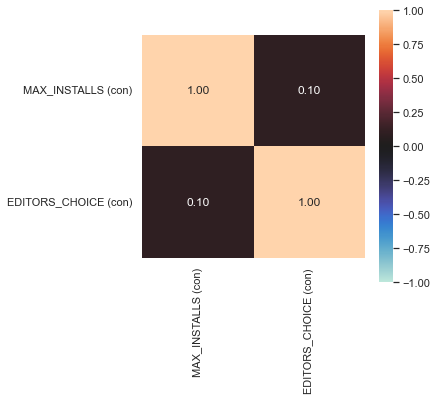

In [44]:
jointDf2 = edited_df[['MAX_INSTALLS','EDITORS_CHOICE']]
nominal.associations(jointDf2, figsize=(5, 5), mark_columns=True);

Looks like MAX_INSTALLS correlates editor's choice better than RATING! <br>
(Notice that we are using nominal to figure out the correlation between numerical and categorical variables.)

### `MAX_INSTALLS` VS `SIZE`

<AxesSubplot:>

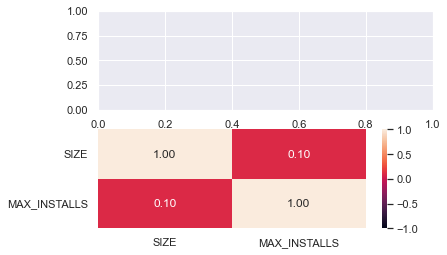

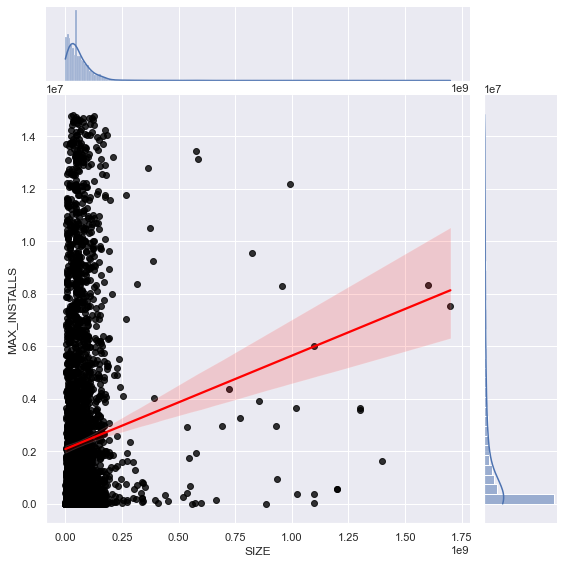

In [152]:
edited_df = df[df['MAX_INSTALLS'] < 14824491.0]
f, axes = plt.subplots(2, 1) 
sb.jointplot(data=edited_df, x="SIZE", y="MAX_INSTALLS", kind="reg", 
             height = 8, scatter_kws={"color": "black"}, line_kws = {"color": "red"}, ax = axes[0])

sb.heatmap(data = edited_df[["SIZE", "MAX_INSTALLS"]].corr(), vmin = -1, vmax = 1, 
           annot = True, fmt=".2f", ax = axes[1])

Size is not a strong variable that contribute to the linear relationship with installs count.

### `MAX_INSTALLS` VS `RATING`

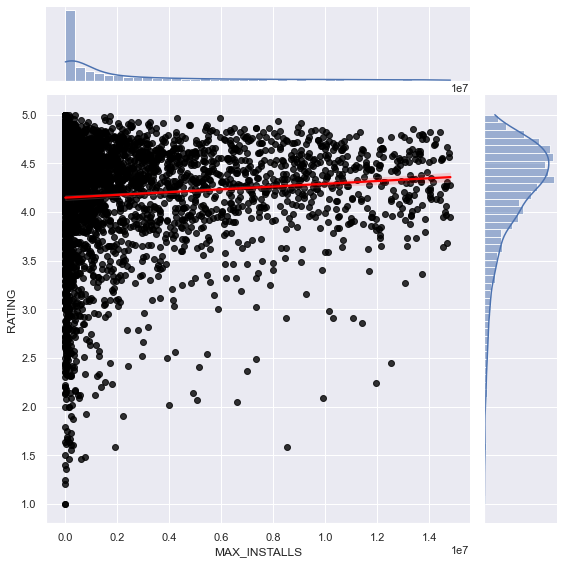

In [125]:
sb.jointplot(data=edited_df, x="MAX_INSTALLS", y="RATING", kind="reg", 
             height = 8, scatter_kws={"color": "black"}, line_kws = {"color": "red"})

It's logical to say that the data are crowded at the top left because that's how the majority trends behaves, if an app is installed commonly, that might imply that the app is highly-rated.

### `MAX_INSTALLS` & `REVIEWS_COUNT`

In [48]:
df3 = Outliers2(df, "REVIEW_COUNT", "MAX_INSTALLS")
df3

There is 2719 outliers in "REVIEW_COUNT" field.
REVIEW_COUNT upper limit:  8067.5
REVIEW_COUNT lower limit:  -4728.5
There is 2687 outliers in "MAX_INSTALLS" field.
MAX_INSTALLS upper limit:  14824491.0
MAX_INSTALLS lower limit:  -8791461.0


APP_NAME    RATING      CATEGORY  \
0         "Ghost Voice Catcher" AUTO EVP  3.933333     Lifestyle   
1                                 "OXXO"  4.740000        Puzzle   
2                                 #DRIVE  4.434152        Racing   
3                              #SelfCare  4.463476  Role Playing   
4         #open Polyamorous + ENM Dating  2.550000        Dating   
...                                  ...       ...           ...   
17463                                코미코  4.000000        Comics   
17464                                투믹스  2.986667        Comics   
17465               피망 뉴맞고: 고스톱 대표 맞고 게임  3.840278          Card   
17466                              허기 워기  4.200000         Music   
17468  🎹  Old Town Road Piano tiles game  3.541667         Music   

       RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
0                68              12               1               6   
1               975              23               0              15   
2            229679            9352            4740           15249   
3             14932             865             336            1088   
4               708             263             163              63   
...             ...             ...             ...             ...   
17463          5626             856             244             611   
17464          6057            1777             646            1050   
17465        352939           68709           19525           14582   
17466           717             143               0               0   
17468           174              56               7               4   

       4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS   FREE  \
0                   7              42          24.0          3608  False   
1                  94             843          54.0         21680  False   
2               47804          152534        6473.0       9119244   True   
3                1353           11290        1501.0       1209692   True   
4                  70             149         362.0         93463   True   
...               ...             ...           ...           ...    ...   
17463             244            3671          30.0       1105682   True   
17464            1050            1534          56.0       1834618   True   
17465           46465          203658         691.0      10454514   True   
17466               0             574           5.0        200717   True   
17468               0             107          28.0        123081   True   

       PRICE         SIZE                DEVELOPER  \
0       5.99    1100000.0        BIG BEARD Studios   
1       0.99   81000000.0    Hamster On Coke Games   
2       0.00  132000000.0  Pixel Perfect Dude S.A.   
3       0.00   83000000.0             TRU LUV Inc.   
4       0.00   19000000.0                    #open   
...      ...          ...                      ...   
17463   0.00   31000000.0                NHN Corp.   
17464   0.00   14000000.0                   (주)투믹스   
17465   0.00   85000000.0              NEOWIZ corp   
17466   0.00   49000000.0         Dark Horror Game   
17468   0.00   54000000.0    🎮 Malone Games Studio   

                                       DEVELOPER_ADDRESS CONTENT_RATING  \
0                        114 1/2 Ash st. Nashua NH 03060       Everyone   
1      ul Jugosłowiańska 37F/10\r\n73-110 Stargard Sz...       Everyone   
2       ul. Polna 28/6 lok. 4\r\n62-800 Kalisz\r\nPolska       Everyone   
3      186-720 King Street West\r\nToronto, Ontario, ...           Teen   
4                                                    NaN     Mature 17+   
...                                                  ...            ...   
17463  13487 경기도 성남시 분당구 대왕판교로645번길 16 NHN 플레이뮤지엄\r\n...           Teen   
17464           서울특별시 강남구 테헤란로 98길 8, 4층(대치동, KT&G 대치타워)           Teen   
17465                경기도 성남시 분당구 대왕판교로 645번길 14 네오위즈판교타워           Teen   
17466                                             

Text(0, 0.5, 'INSTALLATION COUNT')

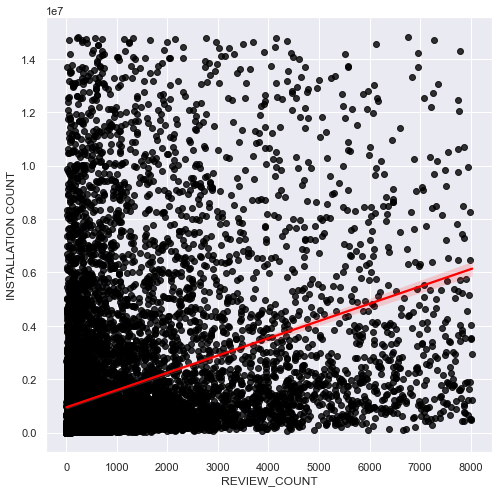

In [49]:
plt.figure(figsize = (8, 8))
sb.regplot(y = "MAX_INSTALLS", x = "REVIEW_COUNT", data = df3, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.ylabel("INSTALLATION COUNT")

There's a steady increase on the installation count when the review count increases.

We are done with exploring installation count. We shall move on to our next chapter.
<a id = 'rating EDA'></a>
# `RATING` EDA
### What is the rating distribution like on Google PlayStore? 

In [130]:
Ratings = df[['1_STAR_RATINGS','2_STAR_RATINGS','3_STAR_RATINGS','4_STAR_RATINGS','5_STAR_RATINGS']]
RatingsCount = pd.DataFrame(Ratings.sum(axis=0))
RatingsCount.columns = ['Count']
fig = px.bar(RatingsCount, x='Count', width=800, height=400)
fig.show()

### Let's find the average rating of an app.


In [131]:
fig = px.histogram(df, x = "RATING", width=800, height=400)
print("The average rating of an app is: ", df['RATING'].mean())
fig.show()

The average rating of an app is:  4.200920665103309


### `RATING` VS `EDITORS_CHOICE`

In [132]:
fig = px.box(df, x = "RATING", color = "EDITORS_CHOICE", width=800, height=400)
fig.show()

It seems like we can be confident that those with rating < 3 are not editor's choice. But from rating > 4 onwards, we can't make accurate prediction from what we have now. 

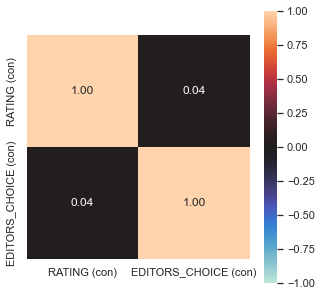

In [53]:
jointDf1 = df[['RATING','EDITORS_CHOICE']]
nominal.associations(jointDf1,figsize=(5, 5),mark_columns=True);

The correlation is unexpectedly low between these 2 variables.<br> Because we normally assume if an app is classified as an editor's choice, then the rating might be high. <br>We need to search for variables that have stronger linear relationship to help with our prediction.
<br><br>
Dython will automatically find which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map. <br>
It will then calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features.

### `RATING` VS `FREE`

What's the distribution of free apps and paid apps?

In [144]:
fig1 = go.Histogram(x = df["FREE"])
fig2 = go.Box(x = df["RATING"], y = df["FREE"], orientation = "h")
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

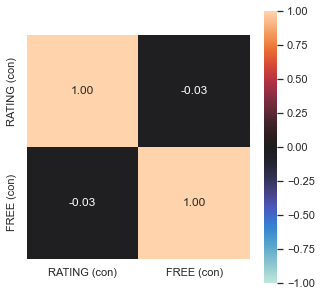

In [55]:
jointDf4 = df[['RATING','FREE']]
nominal.associations(jointDf4,figsize=(5, 5),mark_columns=True);

We finally found our first negatively correlated variable!

### Create categories for `PRICE`

In [56]:
df.loc[ df['PRICE'] == 0, 'PriceBand'] = 'Free'
df.loc[(df['PRICE'] > 0) & (df['PRICE'] <= 0.99), 'PriceBand'] = 'cheap'
df.loc[(df['PRICE'] > 0.99) & (df['PRICE'] <= 2.99), 'PriceBand']   = 'not cheap'
df.loc[(df['PRICE'] > 2.99) & (df['PRICE'] <= 4.99), 'PriceBand']   = 'normal'
df.loc[(df['PRICE'] > 4.99) & (df['PRICE'] <= 14.99), 'PriceBand']   = 'expensive'
df.loc[(df['PRICE'] > 14.99) & (df['PRICE'] <= 29.99), 'PriceBand']   = 'too expensive'
df.loc[(df['PRICE'] > 29.99), 'PriceBand']  = 'FXXXing expensive'
df[['PriceBand', 'RATING']].groupby(['PriceBand']).mean()

RATING
PriceBand                  
FXXXing expensive  3.978817
Free               4.150193
cheap              4.111748
expensive          4.217975
normal             4.205860
not cheap          4.203709
too expensive      4.175401

Text(0.5, 1.0, 'Rating VS PriceBand')

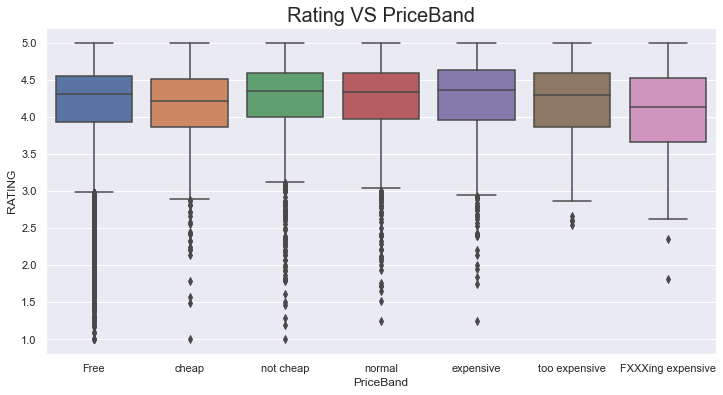

In [57]:
f = plt.figure(figsize=(12, 6))
ORDER = ["Free", "cheap", "not cheap", "normal", "expensive", "too expensive", "FXXXing expensive"]
price = sb.boxplot(x = "PriceBand", y = "RATING", data = df, order = ORDER)
plt.title("Rating VS PriceBand", size = 20)

Let's count the outliers for each category.

In [58]:
def countOutliers2(frame, col, category):
    temp_frame = frame[frame["PriceBand"] == category]
    Q1 = temp_frame[col].quantile(0.25)
    Q3 = temp_frame[col].quantile(0.75)
    IQR = Q3-Q1
    upp_lim = Q3 + 1.5*IQR
    low_lim = Q1 - 1.5*IQR
    count = 0;
    for x in temp_frame[col]:
        if ((x > upp_lim) or (x < low_lim)): count += 1;
    print(f"There is {count} outliers of \"{category}\" apps.")

In [59]:
for x in ORDER: #ORDER is the array of the price categories.
    countOutliers2(df, "RATING", x)

There is 777 outliers of "Free" apps.
There is 23 outliers of "cheap" apps.
There is 88 outliers of "not cheap" apps.
There is 43 outliers of "normal" apps.
There is 29 outliers of "expensive" apps.
There is 4 outliers of "too expensive" apps.
There is 2 outliers of "FXXXing expensive" apps.


### `RATING` VS `AD_SUPPORTED`

In [143]:
fig1 = go.Histogram(x = df["AD_SUPPORTED"])
fig2 = go.Box(x = df["RATING"], y = df["AD_SUPPORTED"], orientation = "h")
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

Suprisingly, the distribution between these 2 are very even, and it's beneficial to our machine learning later.

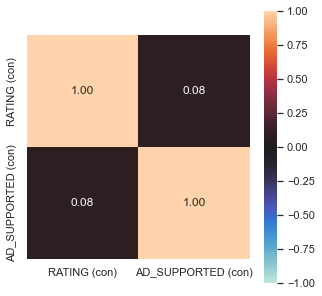

In [61]:
jointDf5 = df[['RATING','AD_SUPPORTED']]
nominal.associations(jointDf5,figsize=(5, 5),mark_columns=True);

Relatively speaking, AD_SUPPORTED is a fine variable correlated with RATING, but still the value is too low.

### `RATING` VS `CONTENT_RATING` 

In [142]:
print(df["CONTENT_RATING"].value_counts())
fig1 = go.Histogram(x = df["CONTENT_RATING"])
fig2 = go.Box(x = df["RATING"], y = df["CONTENT_RATING"], orientation = "h")
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

Everyone           3396
Teen                872
Mature 17+          295
Everyone 10+        275
Adults only 18+       2
Name: CONTENT_RATING, dtype: int64


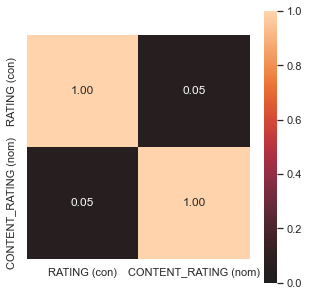

In [63]:
jointDf6 = df[['RATING','CONTENT_RATING']]
nominal.associations(jointDf6,figsize=(5, 5),mark_columns=True);

There's a obvious concentration of the app's rating that are for adults only. As for the apps that are for everyone, it's spread out widely across the rating spectrum. 

### `RATING` VS `IN_APP_PURCHASES`

In [141]:
fig1 = go.Histogram(x = edited_df["IN_APP_PURCHASES"])
fig2 = go.Box(x = edited_df["RATING"], y = edited_df["IN_APP_PURCHASES"], orientation = "h")
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

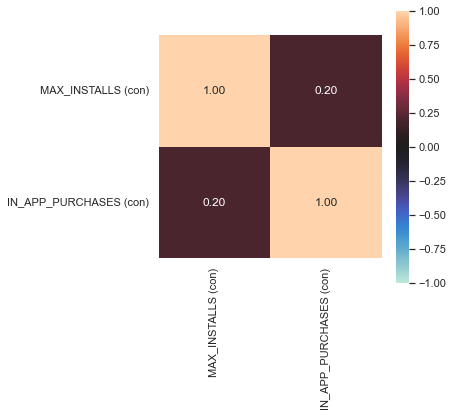

In [65]:
jointdf8 = edited_df[['MAX_INSTALLS','IN_APP_PURCHASES']]
nominal.associations(jointdf8,figsize=(5, 5),mark_columns=True);

This is by far the best variable we can use to predict our installation count! Which makes alot of sense, is ad-supported. Means that they have the income to make their game better. 

### `RATING` VS `DAYS_SINCE_UPDATE`

In [140]:
fig1 = go.Box(x = df["DAYS_SINCE_UPDATE"], orientation = "h")
fig2 = go.Histogram(x = df["DAYS_SINCE_UPDATE"])
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=2, col=1)
fig.update_layout(
    width=800,
    height=500,
)

You might think this is a very skewed data. But in fact, it's very logical. Because apps should be updated frequently, hence the "lower days" section will be more crowded. BUT!
Let's remove the outliers~

In [67]:
edited_df = Outliers(df, "DAYS_SINCE_UPDATE")

There is 2462 outliers in "DAYS_SINCE_UPDATE" field.
DAYS_SINCE_UPDATE upper limit:  423.5
DAYS_SINCE_UPDATE lower limit:  -236.5


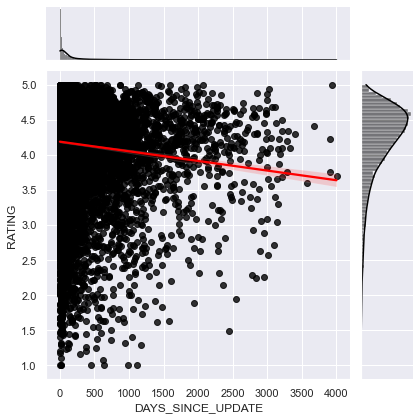

In [119]:
jointDf = edited_df[['DAYS_SINCE_UPDATE', 'RATING']]
sb.jointplot(data = jointDf, x="DAYS_SINCE_UPDATE", y="RATING", kind="reg", color = 'black', line_kws={"color": "red"})

This means that if the longer it took since the last update, we are expecting the app to have a lower rating due to low maintenance of the app.

<a id='category EDA'></a>
# `CATEGORY` EDA

What are the most populated app in Google PlayStore? How many sports app do we have in this dataset?

In [136]:
fig = px.histogram(df, x="CATEGORY").update_xaxes(categoryorder = "total descending")
fig.update_layout(
    width=800,
    height=500,
)
fig.show()

### Performance for each category

In [70]:
fig = px.box(edited_df, x = "RATING", color = "CATEGORY")
fig.update_layout(
    width=1000,
    height=1200,
    margin=dict(l=20, r=40, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

<a id='review count EDA'></a>
# `REVIEW_COUNT` EDA

Text(0.5, 1.0, 'Distribution of Review Count')

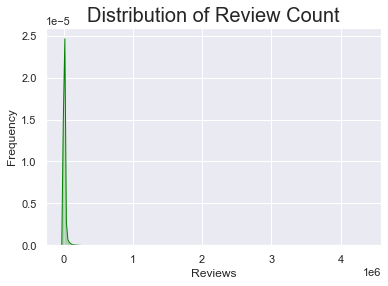

In [71]:
f = sb.kdeplot(df['REVIEW_COUNT'], color="Green", shade = True)
f.set_xlabel("Reviews")
f.set_ylabel("Frequency")
plt.title('Distribution of Review Count',size = 20)

This graph so skewed! We need to clean it by removing outliers.

In [72]:
edited_df = Outliers(df, "REVIEW_COUNT")

There is 2719 outliers in "REVIEW_COUNT" field.
REVIEW_COUNT upper limit:  8067.5
REVIEW_COUNT lower limit:  -4728.5


Text(0.5, 1.0, 'Distribution of Review Counts')

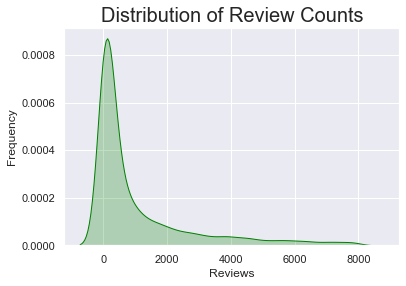

In [73]:
f = sb.kdeplot(edited_df['REVIEW_COUNT'], color="Green", shade = True)
f.set_xlabel("Reviews")
f.set_ylabel("Frequency")
plt.title('Distribution of Review Counts',size = 20)

Now, that's more like it. A better presentation of how many reviews get. Although it's still positively skewed...

### `RATING` VS `REVIEW_COUNTS`

Text(0.5, 1.0, 'Rating VS Reviews Counts')

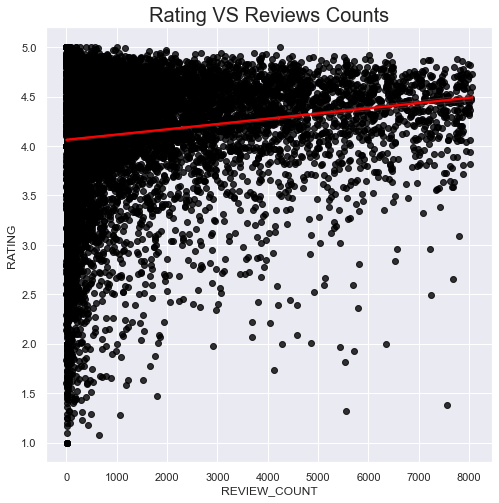

In [74]:
plt.figure(figsize = (8, 8))
sb.regplot(x="REVIEW_COUNT", y="RATING", color = 'black', data=edited_df, line_kws={"color":"red"});
plt.title('Rating VS Reviews Counts',size = 20)

<AxesSubplot:>

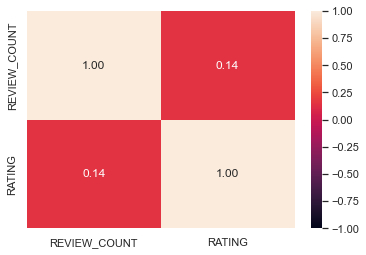

In [75]:
jointDf = edited_df[['REVIEW_COUNT', 'RATING']]
sb.heatmap(jointDf.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

There's a positive relationship between these 2 relationship between rating and review count.

<a id ='size EDA'></a>
# `SIZE` EDA

In [76]:
def num_plots(df, col, title, xlabel):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sb.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sb.histplot(x=col, data=df, ax=ax[1], bins = 50)
    ax[1].set_xlabel(xlabel, fontsize=16)
    plt.tight_layout()
    plt.show()

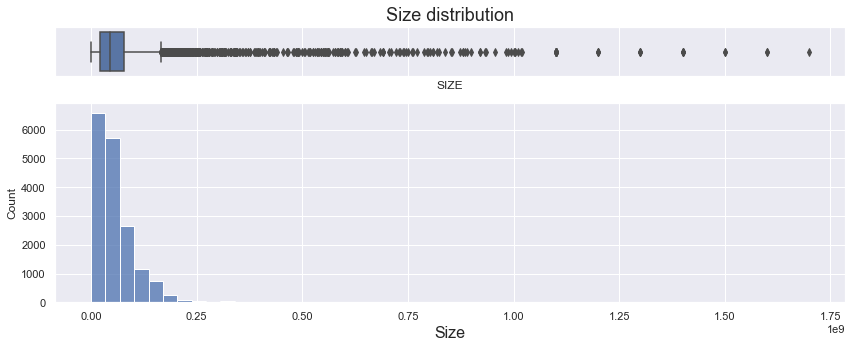

In [77]:
num_plots(df, 'SIZE', 'Size distribution', 'Size')

Text(0.5, 1.0, 'Rating VS Size')

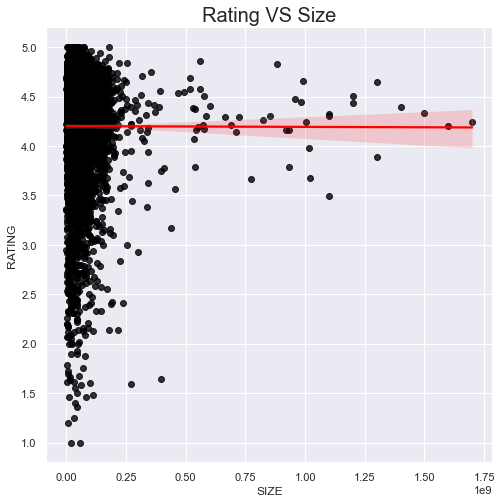

In [153]:
plt.figure(figsize = (8, 8))
sb.regplot(x="SIZE", y="RATING", data=df, color = 'black', line_kws={"color":"red"});
plt.title('Rating VS Size',size = 20)

Remove outliers.

In [79]:
edited_df = Outliers(df, "SIZE")

There is 690 outliers in "SIZE" field.
SIZE upper limit:  165000000.0
SIZE lower limit:  -67000000.0


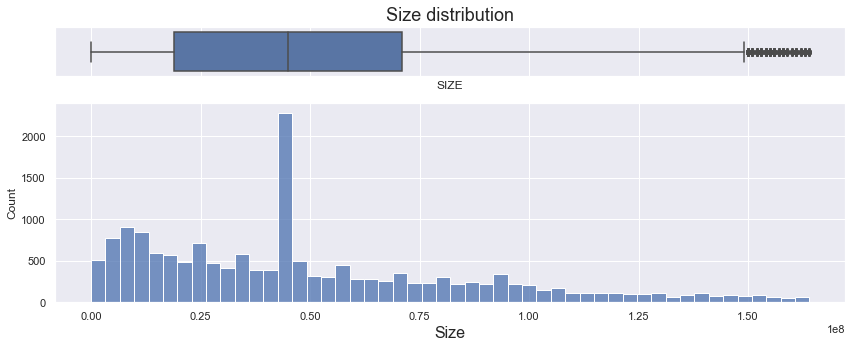

In [80]:
num_plots(edited_df, 'SIZE', 'Size distribution', 'Size')

Text(0.5, 1.0, 'Rating VS Size')

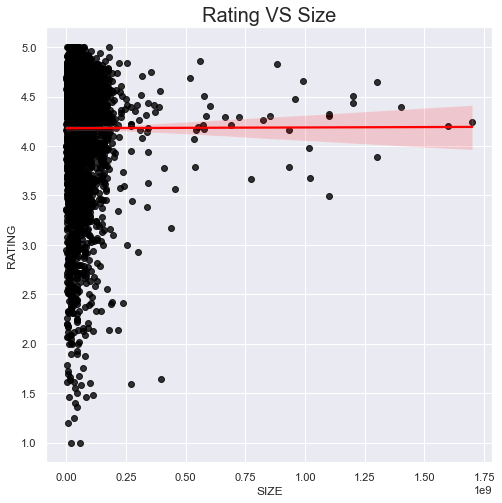

In [154]:
plt.figure(figsize = (8, 8))
sb.regplot(x="SIZE", y="RATING", data=edited_df, color = 'black', line_kws={"color":"red"});
plt.title('Rating VS Size',size = 20)

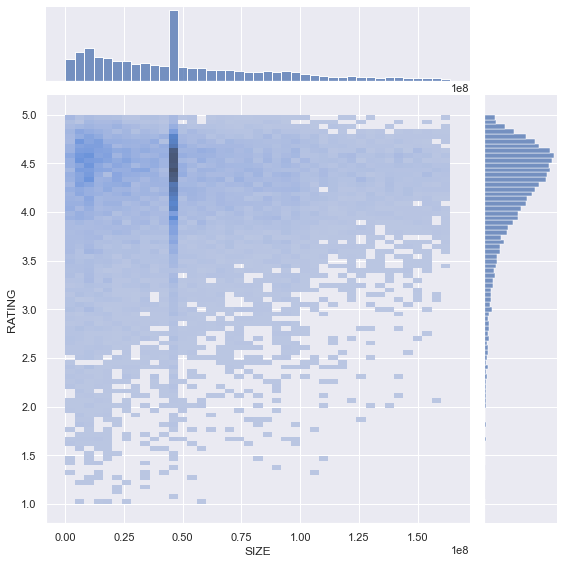

In [82]:
sb.jointplot(data = edited_df, x = "SIZE", y = "RATING", height = 8, kind = "hist")

In this dataset, we have the most frequent data are those around 50 MB and it's rated around 4.50.

<AxesSubplot:>

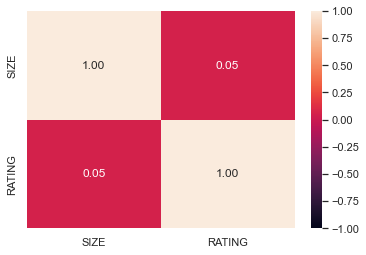

In [83]:
jointDf = edited_df[['SIZE', 'RATING']]
sb.heatmap(jointDf.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Looks like it's almost not correlated at all. But it's kind of intuitive right? Normally people wouldn't rate an app based on its size. 

<a id='singapore EDA'></a>
# Singapore EDA

In [84]:
sg = df.loc[df['COUNTRY'] == 'Singapore']
sg

APP_NAME    RATING           CATEGORY  \
36     1942 🚀 Free classic shooting games  4.587898             Arcade   
37         1945 Air Force: Airplane games  4.698587             Arcade   
72          2nd phone number - call & sms  3.250000      Communication   
118                456 Survival Challenge  4.197674             Action   
123            4Fun Lite - Live Chat Room  4.100000             Social   
...                                   ...       ...                ...   
16455        Word Connect - Fun Word Game  4.739130               Word   
16843                               Yugto  4.630769  Books & Reference   
16925        Zombie War Idle Defense Game  4.448276             Casual   
17125            iQIYI-Drama, Anime, Show  4.456103      Entertainment   
17380                     مسابقة الإسلامي  4.437500             Trivia   

       RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  3_STAR_RATINGS  \
36            73531            3418            1592            3184   
37          1952163           48977           19288           61575   
72            13226            5031             648               0   
118           70831            8599            2741            4022   
123           40144            7953               0             757   
...             ...             ...             ...             ...   
16455          6647              95              30             111   
16843         53165            1227             395            3057   
16925         38747            3435            1145            1336   
17125        829481           82545           15040           18621   
17380          1863             116               0             233   

       4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT  MAX_INSTALLS  FREE  \
36               5478           59859        5305.0       8991266  True   
37             211427         1610896       34945.0     112131352  True   
72               1048            6499         264.0       4492802  True   
118              6131           49338         655.0      18331140  True   
123              2272           29162          74.0      14874675  True   
...               ...             ...           ...           ...   ...   
16455            1027            5384        1657.0        408445  True   
16843            7363           41123         430.0       4100184  True   
16925            1527           31304         591.0       7033818  True   
17125           38139          675136        2913.0      52838429  True   
17380             116            1398          10.0        454054  True   

       PRICE         SIZE                     DEVELOPER  \
36       0.0   45000000.0      OneSoft Global PTE. LTD.   
37       0.0  190000000.0                       ONESOFT   
72       0.0   24000000.0    High-quality Internet call   
118      0.0   57000000.0                  Azura Global   
123      0.0   79000000.0                     SpreadFun   
...      ...          ...                           ...   
16455    0.0   25000000.0  Classic Puzzzle Games Studio   
16843    0.0   26000000.0                  Dreame Media   
16925    0.0  131000000.0      OneSoft Global PTE. LTD.   
17125    0.0   45000000.0                         iQIYI   
17380    0.0   82000000.0                       wz game   

                                    DEVELOPER_ADDRESS CONTENT_RATING  \
36                   470 NORTH BRIDGE ROAD, SINGAPORE       Everyone   
37                   470 NORTH BRIDGE ROAD, SINGAPORE   Everyone 10+   
72                           10 Eunos Road 8,  01-123       Everyone   
118                           Pulau Tekong, Singapore           Teen   
123        3 FRASER STREET， 05-25，DUO TOWER，SINGAPORE     Mature 17+   
...                                               ...            ...   
16455      164 Canberra Drive  The Brownstone  768001       Everyone   
16843            11 WOODLANDS CLOSE  08-20, SINGAPORE           Teen   
16925                470 NORTH BR

In [85]:
print("Number of games in Singapore:",len(sg))
print("Number of developers in Singapore:",len(sg["DEVELOPER"].unique()))

Number of games in Singapore: 205
Number of developers in Singapore: 107


It seems like there are developers that created more than one app. Let's find out which developer has the most number of apps developed.

In [86]:
temp = sg.groupby(['DEVELOPER']).size().reset_index(name='COUNT').sort_values(by = 'COUNT', ascending = False)
temp

DEVELOPER  COUNT
3                                    AMANOTES PTE LTD     17
61                           OneSoft Global PTE. LTD.     14
48                                   LIHUHU PTE. LTD.     11
23                                       Dreame Media      8
14                            Century Games Pte. Ltd.      7
..                                                ...    ...
55             Mods for Minecraft PE by Arata Kenshin      1
54                                        Modo Global      1
1                                            ACNGames      1
17                                      Commandoo Jsc      1
0   2021 Yearly Selection Cloud Gaming - Netboom Ltd.      1

[107 rows x 2 columns]

There are 287 apps developed in Singapore. Let's choose the top 20 apps by rating and installs in Singapore.<br>
First, we sort the singapore dataset by installation count and rating.<br>
Then, we take the top 20.

In [87]:
sg_top_20_rated = sg.sort_values(["MAX_INSTALLS", "RATING"], ascending = False)
sg_top_20_rated = sg_top_20_rated.head(20)
sg_top_20_rated

APP_NAME    RATING  \
12461            SHAREit: Share & File Manager  4.156039   
5855             Garena Free Fire - Illuminate  3.921184   
10579                   PUBG MOBILE: Aftermath  4.100975   
8604                             Magic Tiles 3  3.935281   
14797                     Tiles Hop: EDM Rush!  4.168087   
1496            BeautyPlus-Snap Retouch Filter  4.486609   
15947            WPS Office-PDF,Word,Excel,PPT  4.315896   
16109                                   WeChat  3.748641   
10553           PLAYit-All in One Video Player  4.642533   
6440              Hago-Talk, Live & Play Games  4.256812   
15248             Turbo VPN - Secure VPN Proxy  4.651232   
9513   Music Player & MP3 Player - Lark Player  4.595417   
14093           Sweet Face: beauty face camera  4.466516   
3611             Dancing Road: Color Ball Run!  4.046780   
14013                 SuperVPN Fast VPN Client  4.696103   
5783              Galaxy Attack: Alien Shooter  4.661540   
1878              Bob's World - Super Run Game  4.456242   
13943           Super Bino Go:Adventure Jungle  4.224701   
13460            Space shooter - Galaxy attack  4.786664   
5856                      Garena Free Fire MAX  4.141799   

                      CATEGORY  RATING_COUNT  1_STAR_RATINGS  2_STAR_RATINGS  \
12461                    Tools      16968065         2637001          496300   
5855                    Action     106026036        23983506         2183863   
10579                   Action      41487293         7662376          839578   
8604                     Music       2832992          447567          142573   
14797                    Music       3011736          372687          115026   
1496               Photography       4814233          354684           91864   
15947             Productivity       3742515          355120           95942   
16109            Communication       6103916         1400688          216129   
10553  Video Players & Editors       3729916          174007           52639   
6440                    Social       6045675          560542          157685   
15248                    Tools       6215064          298236           66710   
9513             Music & Audio       2767402          162824           48663   
14093              Photography       1044924           91978           18079   
3611                     Music        729861          101795           34935   
14013                    Tools       2173535          109524           19185   
5783                    Arcade       2185617           85901           31505   
1878                 Adventure        530314           40463           15176   
13943                Adventure        430298           46961           16431   
13460                   Arcade        938561           23115            7601   
5856                    Action       6323291         1120090          111028   

       3_STAR_RATINGS  4_STAR_RATINGS  5_STAR_RATINGS  REVIEW_COUNT  \
12461          690263          902531        12241970       50315.0   
5855          3267671         5361237        71229759      529596.0   
10579         1185130         1759563        30040646      795150.0   
8604           222086          354141         1666625       95367.0   
14797          176130          317346         2030547       77783.0   
1496           164614          447888         3755183       30404.0   
15947          204036          443824         2643593       56023.0   
16109          380447          626143         3480509      212964.0   
10553          112895          253109         3137266       13610.0   
6440           504453          767615         4055380        6078.0   
15248          159903          454651         5235564      118084.0   
9513            74576          172975         2308364       22008.0   
14093           33791           67582          833494        6094.0   
3611            52402           78914          461815       16618.0   
14013           40311          

### Singapore Top performing developers

We will determine the reputation of a developer by evaluating their sum of all of their application's max installation count and average rating of each application.

In [88]:
data2 = sg[["APP_NAME", "DEVELOPER", "RATING", "MAX_INSTALLS"]]
avg_rating = data2.groupby(["DEVELOPER"])["RATING"].mean().to_frame()
sum_installs = data2.groupby(["DEVELOPER"])["MAX_INSTALLS"].sum().to_frame()
sg_dev = pd.merge(avg_rating, sum_installs, on = "DEVELOPER")
sg_dev.sort_values(["RATING", "MAX_INSTALLS"], ascending = False).head(10)

RATING  MAX_INSTALLS
DEVELOPER                                                                
2021 Yearly Selection Cloud Gaming - Netboom Ltd.  4.888230      19820120
PLAYNEXX GAMES                                     4.842593        500701
SM Health Team                                     4.841572       5633058
BOUNCE ENTERTAINMENT COMPANY LIMITED               4.830189        204942
DB RR STUDIO                                       4.825671       5796815
AlphaPlay Games                                    4.770000         40542
Wood Puzzle Sudoku Games                           4.769841       1226129
Sticker Maker Studio                               4.742857       9726600
Classic Puzzzle Games Studio                       4.739130        408445
Rhythm Games Star Studio                           4.737864       1372366

### `RATING` VS `PRICE`

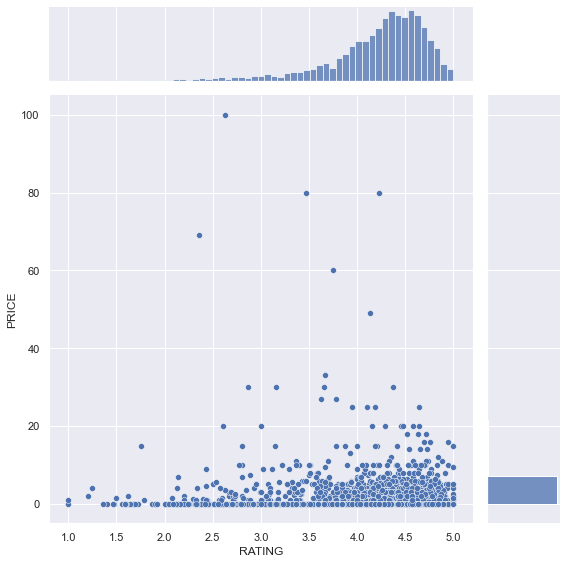

In [155]:
jointDF2 = df[["RATING", "PRICE"]]
sb.jointplot(data = jointDF2, x = "RATING", y = "PRICE", height = 6)

Let's observe closely to the distribution within price < 50

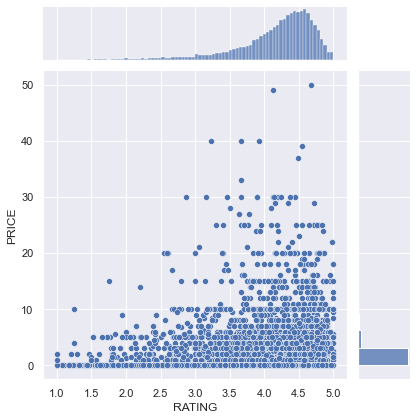

In [90]:
price_less_than_50 = df[df["PRICE"] < 50]
sb.jointplot(data = price_less_than_50, y = "PRICE", x = "RATING", height=6)

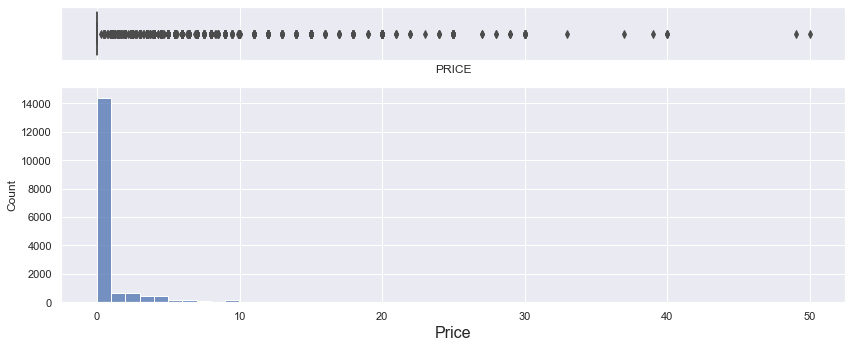

In [91]:
num_plots(price_less_than_50, "PRICE", "", "Price")

<AxesSubplot:xlabel='RATING', ylabel='PRICE'>

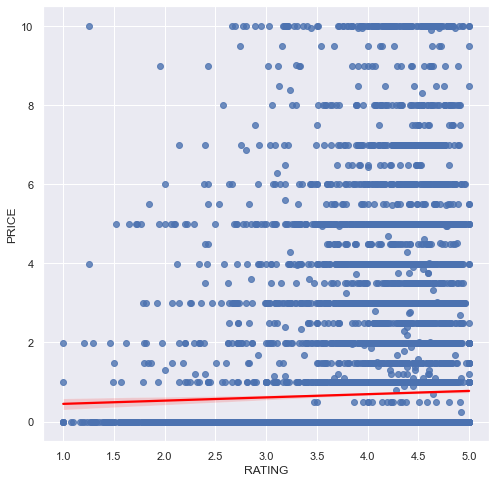

In [92]:
temp = df[df["PRICE"]<10]
plt.figure(figsize = (8, 8))
sb.regplot(y = "PRICE", x = "RATING", data = temp, line_kws={"color": "red"})

<a id='fang EDA'></a>
# FANG EDA

In [93]:
facebook_apps = df[df["APP_NAME"].str.contains("Facebook")]
amazon_apps = df[df["APP_NAME"].str.contains("Amazon")]
netflix_apps = df[df["APP_NAME"].str.contains("Netflix")]
google_apps = df[df["APP_NAME"].str.contains("Google")]

### How many apps did each company developed?


In [94]:
print("Facebook has developed", len(facebook_apps), "app(s).")
print("Amazon has developed", len(amazon_apps), "app(s).")
print("Netflix has developed", len(netflix_apps), "app(s).")
print("Google has developed", len(google_apps), "app(s).")

Facebook has developed 7 app(s).
Amazon has developed 17 app(s).
Netflix has developed 1 app(s).
Google has developed 52 app(s).


In [95]:
FANG = [facebook_apps, amazon_apps, netflix_apps, google_apps]
stringFANG = ["Facebook", "Amazon", "Netflix", "Google"]

### How's the app rating for the company?

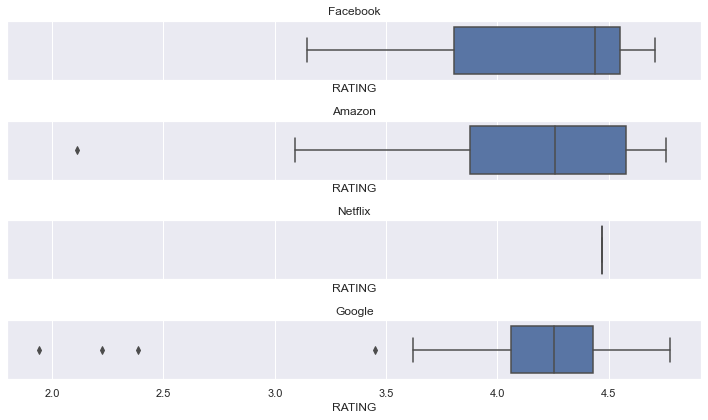

In [96]:
fig, axes = plt.subplots(4, 1, figsize = (10, 6), sharex = True)
x = 0
for i in FANG:
    sb.boxplot(data = i, x = "RATING", ax = axes[x])
    x += 1
x = 0 #reset
for i in stringFANG:
    axes[x].set_title(i)
    x += 1
x = 0 #reset
plt.tight_layout()


### What kind of apps do such great company develop?

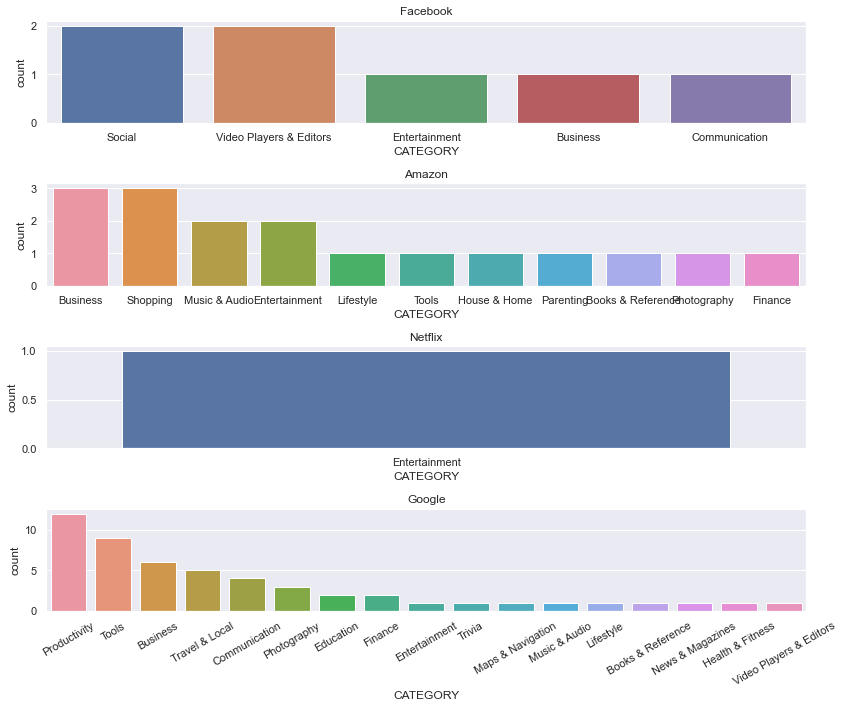

In [97]:
fig, axes = plt.subplots(4, 1, figsize = (12, 10))
x = 0
for i in FANG:
    sb.countplot(x = "CATEGORY", data = i, ax = axes[x] , order = i["CATEGORY"].value_counts().index)
    if (x == 3):
        plt.xticks(rotation = 30)
    x += 1
x = 0 #reset
for i in stringFANG:
    axes[x].set_title(i)
    x += 1
x = 0 #reset
plt.tight_layout()


### Let's find out how each category did in each company, shall we?

In [98]:
fb2 = facebook_apps.groupby(['CATEGORY'])['MAX_INSTALLS'].sum().reset_index()
amz2 = amazon_apps.groupby(['CATEGORY'])['MAX_INSTALLS'].sum().reset_index()
net2 = netflix_apps.groupby(['CATEGORY'])['MAX_INSTALLS'].sum().reset_index()
goog2 = google_apps.groupby(['CATEGORY'])['MAX_INSTALLS'].sum().reset_index()
FANG2 = [fb2, amz2, net2, goog2]

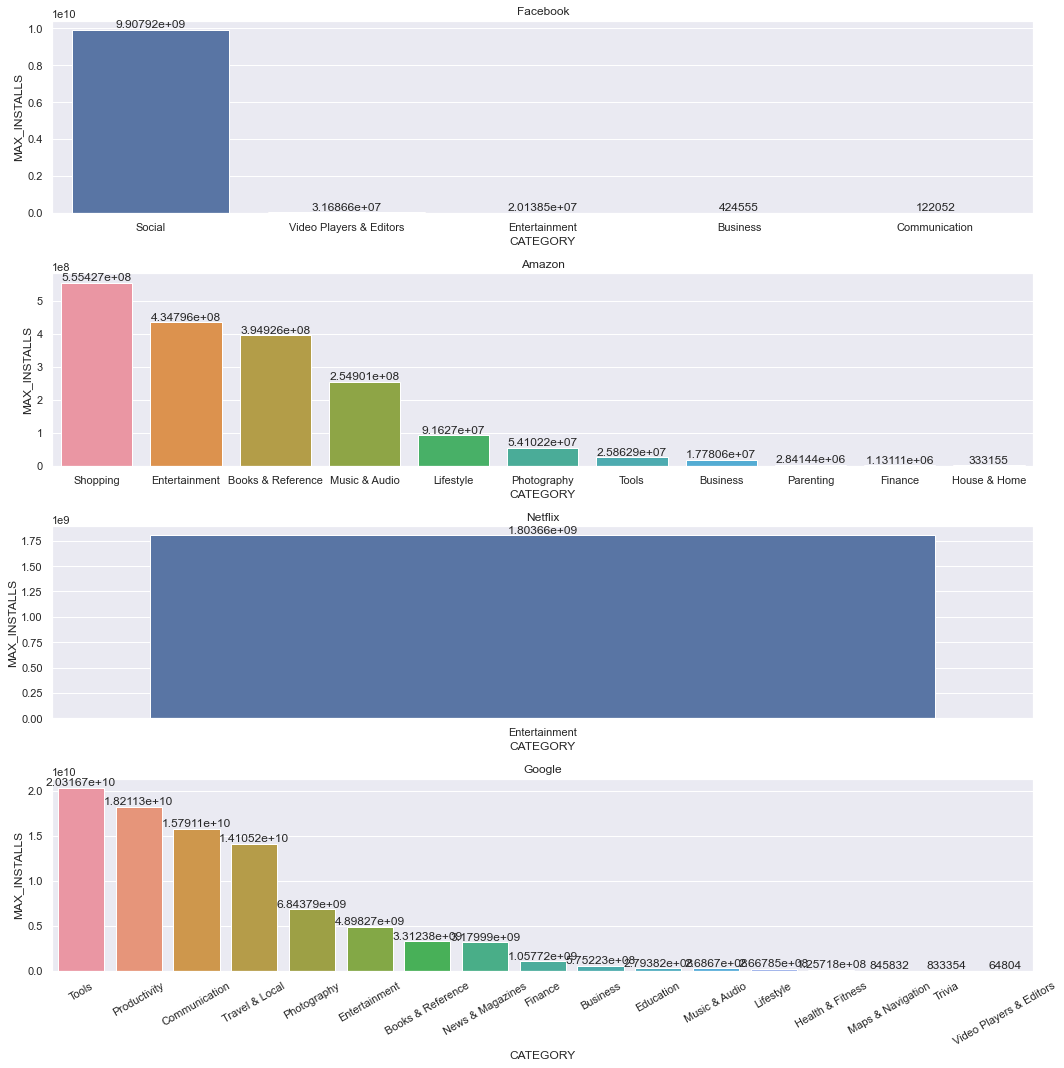

In [99]:
fig, axes = plt.subplots(4, 1, figsize = (15, 15))
x = 0
for i in FANG2:
    ax = sb.barplot(x = "CATEGORY", y = 'MAX_INSTALLS', data = i, ax = axes[x] , order = i.sort_values('MAX_INSTALLS', ascending = False).CATEGORY)
    ax.bar_label(ax.containers[0])
    if (x == 3):
        plt.xticks(rotation = 30)
    x += 1
x = 0 #reset
for i in stringFANG:
    axes[x].set_title(i)
    x += 1
x = 0 #reset
plt.tight_layout()

In fact, it's very intuitive that Facebook's most well-known app falls under the 'Social' category because Facebook is a social media platform. <br>
And Amazon is a e-shopping platform and Netflix is an entertainment platform.<br>And Google is the leading platform in tools, productivity and communication.

<a id ='geospatial analysis'></a>
# Geospatial analysis

We will use the same dataset but will drop those rows without values in the COUNTRY column.

In [100]:
df = pd.read_csv("google_app_scrap_cleaned.csv")
df = df.dropna(subset=['COUNTRY'])

### 1. Comparing the average of max installs of the apps developed by each country.

In [101]:
max_installs_by_mean = pd.DataFrame(df.groupby(["COUNTRY"])["MAX_INSTALLS"].agg("mean"))
max_installs_by_mean.rename(columns={'MAX_INSTALLS': 'MEAN_MAX_INSTALLS'}, inplace = True)
max_installs_by_mean = max_installs_by_mean.nlargest(10,['MEAN_MAX_INSTALLS'])
max_installs_by_mean = max_installs_by_mean.reset_index()
max_installs_by_mean

COUNTRY  MEAN_MAX_INSTALLS
0   Luxembourg       1.874039e+09
1          Usa       1.278689e+08
2      Ireland       7.368652e+07
3  South Korea       5.526386e+07
4         Oman       5.204643e+07
5    Singapore       4.960978e+07
6  Switzerland       4.265305e+07
7       Cyprus       3.512464e+07
8       France       2.950534e+07
9       Turkey       2.188303e+07

In [102]:
sequence = []
for i in range (1000,0,-100):
    sequence.append(i)
max_installs_by_mean['SIZE'] = sequence
max_installs_by_mean
max_installs_by_mean

COUNTRY  MEAN_MAX_INSTALLS  SIZE
0   Luxembourg       1.874039e+09  1000
1          Usa       1.278689e+08   900
2      Ireland       7.368652e+07   800
3  South Korea       5.526386e+07   700
4         Oman       5.204643e+07   600
5    Singapore       4.960978e+07   500
6  Switzerland       4.265305e+07   400
7       Cyprus       3.512464e+07   300
8       France       2.950534e+07   200
9       Turkey       2.188303e+07   100

In [156]:
fig = px.bar(max_installs_by_mean, x='COUNTRY', y='MEAN_MAX_INSTALLS')
fig.update_layout(
    width=800,
    height=500,
)
fig.show()

We have grouped the dataset by country and find their mean of max installs per country. Then we will proceed with picking the top 10 countries. <br>
Usa, South Korea, Singapore, France, Finland, China, Turkey and Hong Kong all remains on the list.

In [158]:
fig = px.scatter_geo(max_installs_by_mean, locations="COUNTRY", 
                     hover_name="COUNTRY", size = 'MEAN_MAX_INSTALLS',locationmode = 'country names')
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

### 2. Comparing the average rating of the apps developed by each country.
We will do the same thing, but this time we will explore on the rating.

In [105]:
rating_by_mean = pd.DataFrame(df.groupby(["COUNTRY"])["RATING"].agg("mean"))
rating_by_mean.rename(columns={'RATING': 'MEAN_RATING'}, inplace = True)

In [159]:
fig = px.box(rating_by_mean, x = "MEAN_RATING",points="all")
fig.update_layout(
    width=800,
    height=500,
)
fig.show()

This figure gives us 2 types of visualizations, boxplot and swarmplot. Which provide us an insight where the majority of data lies in the rating spectrum. Which is 4 to 4.5. <br>
Notice there's a few outliers that have rating that are lower than 3.5. Let's find out which countries are those.

In [107]:
lowest_mean_rating = rating_by_mean[rating_by_mean['MEAN_RATING'] < 3.5]
lowest_mean_rating

MEAN_RATING
COUNTRY             
Belize      3.288830
Iceland     3.462838
Morocco     2.936170
Uganda      2.200000

In [108]:
rating_by_mean = rating_by_mean.nlargest(10,['MEAN_RATING'])
rating_by_mean = rating_by_mean.reset_index()
rating_by_mean

COUNTRY  MEAN_RATING
0          Montenegro     4.800969
1             Moldova     4.742574
2           Venezuela     4.670000
3             Albania     4.633178
4          Costa Rica     4.566433
5             Belarus     4.547344
6               Nepal     4.540000
7                Peru     4.535119
8            Tanzania     4.527273
9  Dominican Republic     4.511111

In [160]:
fig = px.bar(rating_by_mean, x='COUNTRY', y='MEAN_RATING')
fig.update_layout(
    width=800,
    height=500,
)
fig.show()

In [110]:
rating_by_mean = rating_by_mean.nlargest(10,['MEAN_RATING'])
sequence = []
for i in range (1000,0,-100):
    sequence.append(i)
rating_by_mean['SIZE'] = sequence
rating_by_mean


COUNTRY  MEAN_RATING  SIZE
0          Montenegro     4.800969  1000
1             Moldova     4.742574   900
2           Venezuela     4.670000   800
3             Albania     4.633178   700
4          Costa Rica     4.566433   600
5             Belarus     4.547344   500
6               Nepal     4.540000   400
7                Peru     4.535119   300
8            Tanzania     4.527273   200
9  Dominican Republic     4.511111   100

In [111]:
fig = px.scatter_geo(rating_by_mean, locations="COUNTRY", 
                     hover_name="COUNTRY", hover_data=["MEAN_RATING"], size = 'SIZE',locationmode = 'country names')
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

Compared to the previous map, this map's bubbles are more consistent and we can clearly see which bubble is bigger. Because we introduced a rank metric called SIZE which will change the bubble size according the ranking of the country instead of the mean ratings. 